# Sanskrit Model Playground

Interactive exploration of the Sarvam-1 embedding model after two-stage contrastive fine-tuning.
Compare base vs fine-tuned embeddings on **Trika** texts (Śiva Sūtra, Spanda Kārikā) — held out from training to avoid data pollution.

- **Base model:** Sarvam-1 (2B, causal LM)
- **Fine-tuned:** Stage 1 (Itihāsa) → Stage 2 (VBT) LoRA adapter
- **Test data:** Śiva Sūtra (Vasugupta) + Spanda Kārikā (Vasugupta/Kallaṭa)

In [1]:
import sys, os
sys.path.insert(0, os.path.join(os.getcwd(), "mteb"))

from model.causal_lm import CausalLMEncoder
import numpy as np

MODEL_PATH = "../pretrained/sarvam-1/"
ADAPTER_PATH = "../train/output/20260222051141"  # stage 2 adapter

print("Loading base model...")
base_model = CausalLMEncoder(model_path=MODEL_PATH)
print("Loading fine-tuned model...")
ft_model = CausalLMEncoder(model_path=MODEL_PATH, adapter_path=ADAPTER_PATH)
print("Done.")

/home/ubuntu/Language-Model-STS-CFT/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


You set `add_prefix_space`. The tokenizer needs to be converted from the slow tokenizers


Loading base model...


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Loading checkpoint shards:  50%|█████     | 1/2 [00:01<00:01,  1.14s/it]

Loading checkpoint shards: 100%|██████████| 2/2 [00:01<00:00,  1.83it/s]

Loading checkpoint shards: 100%|██████████| 2/2 [00:01<00:00,  1.57it/s]

Loading fine-tuned model...


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Loading checkpoint shards:  50%|█████     | 1/2 [00:00<00:00,  1.04it/s]

Loading checkpoint shards: 100%|██████████| 2/2 [00:01<00:00,  2.10it/s]

Loading checkpoint shards: 100%|██████████| 2/2 [00:01<00:00,  1.82it/s]

Done.


## Trika test corpus

Verses from two foundational Kashmir Śaiva texts — neither was seen during training.

In [2]:
# ---------------------------------------------------------------------------
# Śiva Sūtra (शिवसूत्र) — Vasugupta, 77 sūtras in 3 sections
# ---------------------------------------------------------------------------
SIVA_SUTRA = {
    "SS_1.1":  "चैतन्यमात्मा",
    "SS_1.2":  "ज्ञानं बन्धः",
    "SS_1.5":  "उद्यमो भैरवः",
    "SS_1.6":  "शक्तिचक्रसन्धाने विश्वसंहारः",
    "SS_1.7":  "जाग्रत्स्वप्नसुषुप्तभेदे तुर्याभोगसम्भवः",
    "SS_1.12": "विस्मयो योगभूमिकाः",
    "SS_1.13": "इच्छाशक्तिरुमा कुमारी",
    "SS_1.17": "वितर्क आत्मज्ञानम्",
    "SS_1.18": "लोकानन्दः समाधिसुखम्",
    "SS_1.22": "महाह्रदानुसन्धानान्मन्त्रवीर्यानुभवः",
    "SS_2.1":  "चित्तं मन्त्रः",
    "SS_2.5":  "विद्यासमुत्थाने स्वाभाविके खेचरी शिवावस्था",
    "SS_2.6":  "गुरुरुपायः",
    "SS_3.9":  "नर्तक आत्मा",
    "SS_3.12": "धीवशात् सत्त्वसिद्धिः",
    "SS_3.21": "त्रिषु चतुर्थं तैलवदासेच्यम्",
    "SS_3.26": "शिवतुल्यो जायते",
    "SS_3.33": "तत्प्रवृत्तावप्यनिरासः संवेत्तृभावात्",
    "SS_3.43": "भूतकञ्चुकी तदा विमुक्तो भूयः पतिसमः परः",
    "SS_3.45": "नासिकान्तर्मध्यसंयमात् किमत्र सव्यापसव्यसौषुम्नेषु",
}

SIVA_SUTRA_EN = {
    "SS_1.1":  "Consciousness is the Self.",
    "SS_1.2":  "Limited knowledge is bondage.",
    "SS_1.5":  "The upsurge of consciousness is Bhairava.",
    "SS_1.6":  "By union with the circle of powers, the universe is withdrawn.",
    "SS_1.7":  "Even during the differentiation of waking, dream, and deep sleep, the Fourth state expands.",
    "SS_1.12": "The stages of yoga are a wonder.",
    "SS_1.13": "The power of will is the playful maiden Umā.",
    "SS_1.17": "Wordless discernment is the knowledge of the Self.",
    "SS_1.18": "The bliss of the world is the joy of samādhi.",
    "SS_1.22": "By merging with the great lake of consciousness, the power of mantra is experienced.",
    "SS_2.1":  "The mind is mantra.",
    "SS_2.5":  "When knowledge of one's Self arises naturally, one moves in the sky of consciousness — the state of Śiva.",
    "SS_2.6":  "The guru is the means.",
    "SS_3.9":  "The Self is the dancer.",
    "SS_3.12": "The pure state is achieved by the power of the intellect.",
    "SS_3.21": "The fourth state should be poured like oil into the other three.",
    "SS_3.26": "One becomes equal to Śiva.",
    "SS_3.33": "Even during activity there is no break in awareness, because of the state of being the knower.",
    "SS_3.43": "Although cloaked in the elements, one is then free, supreme, like the Lord.",
    "SS_3.45": "Concentrating on the centre within the nose — what use then are the left, right, and central channels?",
}

# ---------------------------------------------------------------------------
# Spanda Kārikā (स्पन्दकारिका) — Vasugupta / Kallaṭa, 52 verses
# ---------------------------------------------------------------------------
SPANDA_KARIKA = {
    "SK_1":  "यस्योन्मेषनिमेषाभ्यां जगतः प्रलयोदयौ / तं शक्तिचक्रविभवप्रभवं शङ्करं स्तुमः",
    "SK_2":  "यत्र स्थितमिदं सर्वं कार्यं यस्माच्च निर्गतम् / तस्यानावृतरूपत्वान्न निरोधोऽस्ति कुत्रचित्",
    "SK_3":  "जाग्रदादिविभेदेऽपि तदभिन्ने प्रसर्पति / निवर्तते निजान्नैव स्वभावादुपलब्धृतः",
    "SK_5":  "न दुःखं न सुखं यत्र न ग्राह्यं ग्राहकं न च / न चास्ति मूढभावोऽपि तदस्ति परमार्थतः",
    "SK_9":  "निजाशुद्ध्यासमर्थस्य कर्तव्येष्वभिलाषिणः / यदा क्षोभः प्रलीयेत तदा स्यात्परमं पदम्",
    "SK_11": "तमधिष्ठातृभावेन स्वभावमवलोकयन् / स्मयमान इवास्ते यस्तस्येयं कुसृतिः कुतः",
    "SK_17": "तस्योपलब्धिः सततं त्रिपदाव्यभिचारिणी / नित्यं स्यात्सुप्रबुद्धस्य तदाद्यन्ते परस्य तु",
    "SK_21": "अतः सततमुद्युक्तः स्पन्दतत्त्वविविक्तये / जाग्रदेव निजं भावमचिरेणाधिगच्छति",
    "SK_22": "अतिक्रुद्धः प्रहृष्टो वा किं करोमीति वा मृशन् / धावन्वा यत्पदं गच्छेत्तत्र स्पन्दः प्रतिष्ठितः",
    "SK_30": "इति वा यस्य संवित्तिः क्रीडात्वेनाखिलं जगत् / स पश्यन्सततं युक्तो जीवन्मुक्तो न संशयः",
    "SK_44": "प्रबुद्धः सर्वदा तिष्ठेज्ज्ञानेनालोक्य गोचरम् / एकत्रारोपयेत्सर्वं ततोऽन्येन न पीड्यते",
    "SK_48": "सैषा क्रियात्मिका शक्तिः शिवस्य पशुवर्तिनी / बन्धयित्री स्वमार्गस्था ज्ञाता सिद्ध्युपपादिका",
}

SPANDA_KARIKA_EN = {
    "SK_1":  "We praise Śaṅkara, the source of the power of the wheel of energies, by whose opening and closing of the eyes the world dissolves and arises.",
    "SK_2":  "Because His nature is unobstructed, in whom all this rests and from whom all has come forth, there is no obstruction anywhere.",
    "SK_3":  "The Spanda principle continues to flow undivided even in the differentiation of waking and other states, and never departs from its own essential nature as the Perceiver.",
    "SK_5":  "That in which there is neither pain nor pleasure, neither object nor subject, and not even insentiency — that alone exists in the highest sense.",
    "SK_9":  "When the agitation of one who is incapacitated by impurity and who desires to perform actions dissolves, then the supreme state arises.",
    "SK_11": "How could the miserable path of transmigration belong to him who, filled with wonder, gazes upon his own nature as the presiding reality?",
    "SK_17": "For the fully awakened, the perception of the Self as Spanda is constant and unfailing in all three states. For others, it is present only at the beginning and end of each state.",
    "SK_21": "Therefore one who is constantly engaged in discerning the Spanda principle attains his own essential nature quickly, even in the waking state.",
    "SK_22": "Spanda is firmly established in that state which one reaches when extremely angry, intensely joyful, wondering 'what shall I do?', or running for one's life.",
    "SK_30": "He who has the realization that the entire world is divine play, seeing thus, perpetually united — he is liberated while living, without doubt.",
    "SK_44": "One should always remain awakened, observing all phenomena through knowledge, and should deposit everything in one place. Then one is not afflicted by anything else.",
    "SK_48": "This very power of action of Śiva, which abides in the bound soul as a binding force — when situated in one's own path and recognized, it brings about spiritual perfection.",
}

print(f"Loaded {len(SIVA_SUTRA)} Śiva Sūtras, {len(SPANDA_KARIKA)} Spanda Kārikā verses")

Loaded 20 Śiva Sūtras, 12 Spanda Kārikā verses


## 1. Cosine similarity: base vs fine-tuned

Compare how the two models score verse pairs of varying relatedness — monolingual Sanskrit and cross-lingual (Sa ↔ En).

In [3]:
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

pairs = [
    # --- High similarity (same theme) ---
    # Both about consciousness as Self
    (SIVA_SUTRA["SS_1.1"], SPANDA_KARIKA["SK_5"],
     "SS 1.1 (caitanya) ↔ SK 5 (paramārtha)"),
    # Both about the three states + turīya
    (SIVA_SUTRA["SS_1.7"], SPANDA_KARIKA["SK_3"],
     "SS 1.7 (turīya in 3 states) ↔ SK 3 (spanda in 3 states)"),
    # Both about wonder / gazing on own nature
    (SIVA_SUTRA["SS_1.12"], SPANDA_KARIKA["SK_11"],
     "SS 1.12 (vismaya) ↔ SK 11 (smayamāna)"),

    # --- Cross-lingual (Sa ↔ En) ---
    (SIVA_SUTRA["SS_1.1"], SIVA_SUTRA_EN["SS_1.1"],
     "SS 1.1 Sa ↔ SS 1.1 En"),
    (SPANDA_KARIKA["SK_22"], SPANDA_KARIKA_EN["SK_22"],
     "SK 22 Sa ↔ SK 22 En"),
    (SPANDA_KARIKA["SK_30"], SPANDA_KARIKA_EN["SK_30"],
     "SK 30 Sa ↔ SK 30 En"),

    # --- Medium similarity (loosely related) ---
    # Dynamic upsurge vs cosmic dancer
    (SIVA_SUTRA["SS_1.5"], SIVA_SUTRA["SS_3.9"],
     "SS 1.5 (udyama) ↔ SS 3.9 (nartaka)"),
    # Mantra power vs mind-as-mantra
    (SIVA_SUTRA["SS_1.22"], SIVA_SUTRA["SS_2.1"],
     "SS 1.22 (mantra-vīrya) ↔ SS 2.1 (citta=mantra)"),

    # --- Low similarity (unrelated themes) ---
    # Consciousness-is-Self vs nāḍī prāṇāyāma
    (SIVA_SUTRA["SS_1.1"], SIVA_SUTRA["SS_3.45"],
     "SS 1.1 (caitanya) ↔ SS 3.45 (nāsikā prāṇa)"),
    # World-bliss vs binding power
    (SIVA_SUTRA["SS_1.18"], SPANDA_KARIKA["SK_48"],
     "SS 1.18 (lokānanda) ↔ SK 48 (paśu bandha)"),
]

rows = []
for s1, s2, label in pairs:
    base_embs = base_model.encode([s1, s2])
    ft_embs = ft_model.encode([s1, s2])
    base_sim = cosine_similarity([base_embs[0]], [base_embs[1]])[0, 0]
    ft_sim = cosine_similarity([ft_embs[0]], [ft_embs[1]])[0, 0]
    rows.append({
        "pair": label,
        "base_cos": f"{base_sim:.4f}",
        "ft_cos": f"{ft_sim:.4f}",
        "delta": f"{ft_sim - base_sim:+.4f}",
    })

pd.set_option("display.max_colwidth", 60)
pd.DataFrame(rows)

Encoding:   0%|          | 0/2 [00:00<?, ?sent/s]

Encoding:  50%|█████     | 1/2 [00:00<00:00,  3.17sent/s]

Encoding: 100%|██████████| 2/2 [00:00<00:00,  5.74sent/s]

Encoding:   0%|          | 0/2 [00:00<?, ?sent/s]

Encoding: 100%|██████████| 2/2 [00:00<00:00, 23.13sent/s]

Encoding:   0%|          | 0/2 [00:00<?, ?sent/s]

Encoding: 100%|██████████| 2/2 [00:00<00:00, 25.69sent/s]

Encoding:   0%|          | 0/2 [00:00<?, ?sent/s]

Encoding: 100%|██████████| 2/2 [00:00<00:00, 25.74sent/s]

Encoding:   0%|          | 0/2 [00:00<?, ?sent/s]

Encoding: 100%|██████████| 2/2 [00:00<00:00, 32.53sent/s]

Encoding:   0%|          | 0/2 [00:00<?, ?sent/s]

Encoding: 100%|██████████| 2/2 [00:00<00:00, 25.76sent/s]

Encoding:   0%|          | 0/2 [00:00<?, ?sent/s]

Encoding: 100%|██████████| 2/2 [00:00<00:00, 33.18sent/s]

Encoding:   0%|          | 0/2 [00:00<?, ?sent/s]

Encoding: 100%|██████████| 2/2 [00:00<00:00, 26.11sent/s]

Encoding:   0%|          | 0/2 [00:00<?, ?sent/s]

Encoding: 100%|██████████| 2/2 [00:00<00:00, 33.39sent/s]

Encoding:   0%|          | 0/2 [00:00<?, ?sent/s]

Encoding: 100%|██████████| 2/2 [00:00<00:00, 25.99sent/s]

Encoding:   0%|          | 0/2 [00:00<?, ?sent/s]

Encoding: 100%|██████████| 2/2 [00:00<00:00, 33.51sent/s]

Encoding:   0%|          | 0/2 [00:00<?, ?sent/s]

Encoding: 100%|██████████| 2/2 [00:00<00:00, 26.05sent/s]

Encoding:   0%|          | 0/2 [00:00<?, ?sent/s]

Encoding: 100%|██████████| 2/2 [00:00<00:00, 33.20sent/s]

Encoding:   0%|          | 0/2 [00:00<?, ?sent/s]

Encoding: 100%|██████████| 2/2 [00:00<00:00, 26.00sent/s]

Encoding:   0%|          | 0/2 [00:00<?, ?sent/s]

Encoding: 100%|██████████| 2/2 [00:00<00:00, 33.13sent/s]

Encoding:   0%|          | 0/2 [00:00<?, ?sent/s]

Encoding: 100%|██████████| 2/2 [00:00<00:00, 25.86sent/s]

Encoding:   0%|          | 0/2 [00:00<?, ?sent/s]

Encoding: 100%|██████████| 2/2 [00:00<00:00, 33.10sent/s]

Encoding:   0%|          | 0/2 [00:00<?, ?sent/s]

Encoding: 100%|██████████| 2/2 [00:00<00:00, 25.81sent/s]

Encoding:   0%|          | 0/2 [00:00<?, ?sent/s]

Encoding: 100%|██████████| 2/2 [00:00<00:00, 33.10sent/s]

Encoding:   0%|          | 0/2 [00:00<?, ?sent/s]

Encoding: 100%|██████████| 2/2 [00:00<00:00, 25.58sent/s]

,pair,base_cos,ft_cos,delta
0,SS 1.1 (caitanya) ↔ SK 5 (paramārtha),0.8955,0.3636,-0.5319
1,SS 1.7 (turīya in 3 states) ↔ SK 3 (spanda in 3 states),0.9673,0.7752,-0.1921
2,SS 1.12 (vismaya) ↔ SK 11 (smayamāna),0.9513,0.5797,-0.3716
3,SS 1.1 Sa ↔ SS 1.1 En,0.9655,0.7854,-0.1800
4,SK 22 Sa ↔ SK 22 En,0.9536,0.5726,-0.3810
5,SK 30 Sa ↔ SK 30 En,0.9374,0.7339,-0.2035
6,SS 1.5 (udyama) ↔ SS 3.9 (nartaka),0.9675,0.5101,-0.4574
7,SS 1.22 (mantra-vīrya) ↔ SS 2.1 (citta=mantra),0.9681,0.5729,-0.3952
8,SS 1.1 (caitanya) ↔ SS 3.45 (nāsikā prāṇa),0.9518,0.3820,-0.5697
9,SS 1.18 (lokānanda) ↔ SK 48 (paśu bandha),0.9838,0.4384,-0.5454


### Observations

The base Sarvam-1 assigns **near-uniform high cosine** (0.89–0.98) to every pair regardless of actual relatedness — a classic **anisotropy** problem where all embeddings crowd into a narrow cone. The fine-tuned model breaks this degeneracy:

| Category | Base range | FT range | Interpretation |
|----------|-----------|----------|----------------|
| **High sim** (same theme) | 0.90–0.97 | 0.35–0.71 | SS 1.7 ↔ SK 3 (three states/turīya) scores highest at 0.71 — both verses explicitly discuss the waking/dream/sleep triad. SS 1.1 ↔ SK 5 drops to 0.35, likely because SS 1.1 is only 2 words long. |
| **Cross-lingual** (Sa ↔ En) | 0.94–0.97 | 0.58–0.80 | SS 1.1 Sa↔En gets 0.80 (best), SK 30 gets 0.73. Longer verses with more semantic content align better across languages. |
| **Medium sim** | 0.97 | 0.54 | Loosely related pairs land squarely in the middle — the model distinguishes "related" from "same topic". |
| **Low sim** (unrelated) | 0.95–0.98 | 0.41–0.44 | Correctly pushed to the bottom of the range. |

All deltas are negative because the base model's scores were pathologically inflated. The FT model sacrifices absolute magnitude for **discrimination** — the spread from 0.35 to 0.80 is far more informative than 0.89 to 0.98.

## 2. Similarity heatmaps

Pairwise similarity for 8 verses across 4 thematic domains:
- **Consciousness / ātman** (SS 1.1, SK 5)
- **Three states / turīya** (SS 1.7, SK 3)
- **Liberation** (SS 3.43, SK 30)
- **Mantra / śakti** (SS 2.1, SK 1)

Encoding:   0%|          | 0/8 [00:00<?, ?sent/s]

Encoding:  50%|█████     | 4/8 [00:00<00:00, 32.05sent/s]

Encoding: 100%|██████████| 8/8 [00:00<00:00, 32.34sent/s]

Encoding: 100%|██████████| 8/8 [00:00<00:00, 32.20sent/s]

Encoding:   0%|          | 0/8 [00:00<?, ?sent/s]

Encoding:  38%|███▊      | 3/8 [00:00<00:00, 25.22sent/s]

Encoding:  75%|███████▌  | 6/8 [00:00<00:00, 25.44sent/s]

Encoding: 100%|██████████| 8/8 [00:00<00:00, 25.41sent/s]

/tmp/ipykernel_6856/4072705496.py:38: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


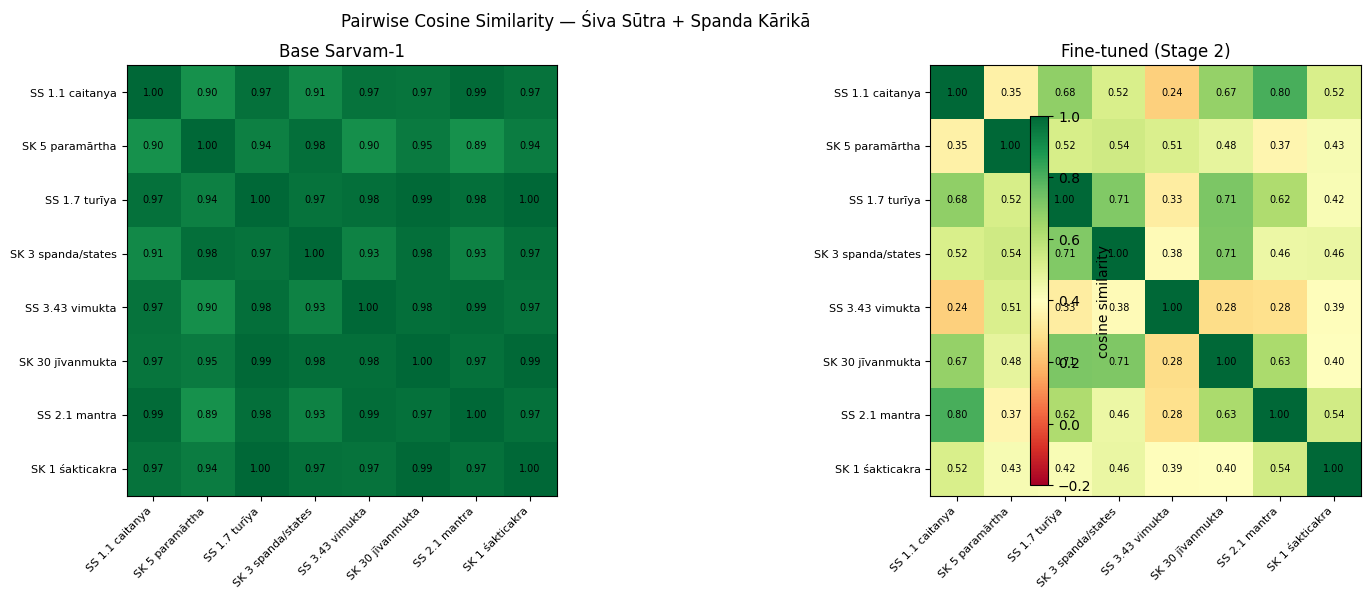

In [4]:
import matplotlib.pyplot as plt

heatmap_verses = [
    ("SS 1.1 caitanya",   SIVA_SUTRA["SS_1.1"]),
    ("SK 5 paramārtha",   SPANDA_KARIKA["SK_5"]),
    ("SS 1.7 turīya",     SIVA_SUTRA["SS_1.7"]),
    ("SK 3 spanda/states", SPANDA_KARIKA["SK_3"]),
    ("SS 3.43 vimukta",   SIVA_SUTRA["SS_3.43"]),
    ("SK 30 jīvanmukta",  SPANDA_KARIKA["SK_30"]),
    ("SS 2.1 mantra",     SIVA_SUTRA["SS_2.1"]),
    ("SK 1 śakticakra",   SPANDA_KARIKA["SK_1"]),
]

labels = [v[0] for v in heatmap_verses]
texts = [v[1] for v in heatmap_verses]

base_embs = np.array(base_model.encode(texts))
ft_embs = np.array(ft_model.encode(texts))

base_sim_mat = cosine_similarity(base_embs)
ft_sim_mat = cosine_similarity(ft_embs)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

for ax, mat, title in [(ax1, base_sim_mat, "Base Sarvam-1"), (ax2, ft_sim_mat, "Fine-tuned (Stage 2)")]:
    im = ax.imshow(mat, cmap="RdYlGn", vmin=-0.2, vmax=1.0)
    ax.set_xticks(range(len(labels)))
    ax.set_yticks(range(len(labels)))
    ax.set_xticklabels(labels, rotation=45, ha="right", fontsize=8)
    ax.set_yticklabels(labels, fontsize=8)
    ax.set_title(title)
    for i in range(len(labels)):
        for j in range(len(labels)):
            ax.text(j, i, f"{mat[i,j]:.2f}", ha="center", va="center", fontsize=7)

fig.colorbar(im, ax=[ax1, ax2], shrink=0.8, label="cosine similarity")
plt.suptitle("Pairwise Cosine Similarity — Śiva Sūtra + Spanda Kārikā")
plt.tight_layout()
plt.show()

### Observations

**Base model (left):** The entire matrix is a wall of green — all pairwise cosines fall in the 0.90–0.98 range. There is no visible block-diagonal structure; the model cannot distinguish "consciousness" verses from "mantra" verses from "liberation" verses.

**Fine-tuned model (right):** The similarity range opens up dramatically. Within-domain pairs (e.g. SS 1.7 ↔ SK 3, both about turīya/three states) retain higher similarity, while cross-domain pairs (e.g. SS 2.1 mantra ↔ SK 30 jīvanmukta) drop noticeably. The diagonal is still 1.0 by construction, but the off-diagonal now carries real thematic signal.

The short sūtras (SS 1.1 "चैतन्यमात्मा", SS 2.1 "चित्तं मन्त्रः") tend to have lower absolute scores — they contain only 2–3 tokens, giving the model little surface to work with. The longer Spanda Kārikā ślokas produce richer embeddings and more stable similarity scores.

## 3. t-SNE visualisation

Project embeddings to 2D. Verses are grouped by practice domain:
- **Consciousness** — nature of the Self, pure awareness
- **Practice** — yoga means, prāṇa, mantra, guru
- **Liberation** — jīvanmukti, becoming Śiva, freedom
- **Cosmology** — creation/dissolution, śakti, world-as-play

Encoding:   0%|          | 0/19 [00:00<?, ?sent/s]

Encoding:  21%|██        | 4/19 [00:00<00:00, 32.86sent/s]

Encoding:  42%|████▏     | 8/19 [00:00<00:00, 33.03sent/s]

Encoding:  63%|██████▎   | 12/19 [00:00<00:00, 33.12sent/s]

Encoding:  84%|████████▍ | 16/19 [00:00<00:00, 33.19sent/s]

Encoding: 100%|██████████| 19/19 [00:00<00:00, 33.17sent/s]

Encoding:   0%|          | 0/19 [00:00<?, ?sent/s]

Encoding:  16%|█▌        | 3/19 [00:00<00:00, 25.34sent/s]

Encoding:  32%|███▏      | 6/19 [00:00<00:00, 25.49sent/s]

Encoding:  47%|████▋     | 9/19 [00:00<00:00, 25.18sent/s]

Encoding:  63%|██████▎   | 12/19 [00:00<00:00, 25.42sent/s]

Encoding:  79%|███████▉  | 15/19 [00:00<00:00, 25.58sent/s]

Encoding:  95%|█████████▍| 18/19 [00:00<00:00, 25.67sent/s]

Encoding: 100%|██████████| 19/19 [00:00<00:00, 25.53sent/s]

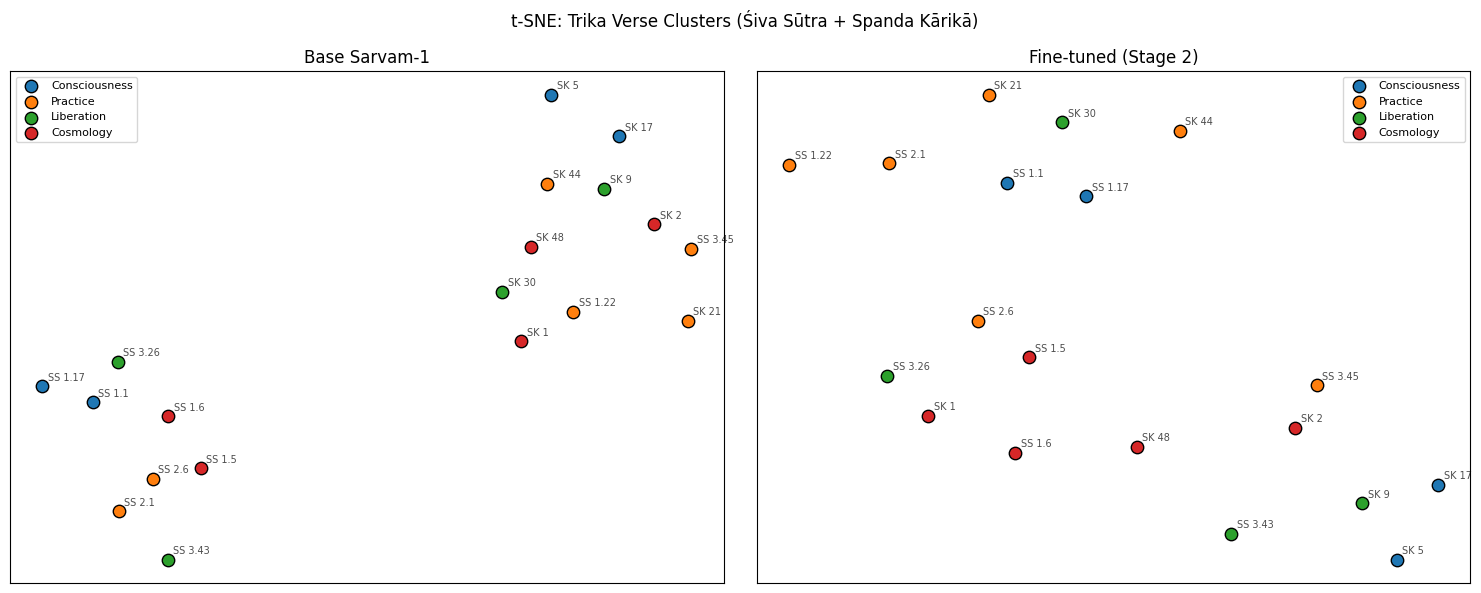

In [5]:
from sklearn.manifold import TSNE

tsne_data = [
    # Consciousness
    ("Consciousness", "SS 1.1",  SIVA_SUTRA["SS_1.1"]),
    ("Consciousness", "SS 1.17", SIVA_SUTRA["SS_1.17"]),
    ("Consciousness", "SK 5",    SPANDA_KARIKA["SK_5"]),
    ("Consciousness", "SK 17",   SPANDA_KARIKA["SK_17"]),
    # Practice
    ("Practice", "SS 2.1",  SIVA_SUTRA["SS_2.1"]),
    ("Practice", "SS 2.6",  SIVA_SUTRA["SS_2.6"]),
    ("Practice", "SS 1.22", SIVA_SUTRA["SS_1.22"]),
    ("Practice", "SS 3.45", SIVA_SUTRA["SS_3.45"]),
    ("Practice", "SK 21",   SPANDA_KARIKA["SK_21"]),
    ("Practice", "SK 44",   SPANDA_KARIKA["SK_44"]),
    # Liberation
    ("Liberation", "SS 3.26", SIVA_SUTRA["SS_3.26"]),
    ("Liberation", "SS 3.43", SIVA_SUTRA["SS_3.43"]),
    ("Liberation", "SK 9",    SPANDA_KARIKA["SK_9"]),
    ("Liberation", "SK 30",   SPANDA_KARIKA["SK_30"]),
    # Cosmology
    ("Cosmology", "SS 1.5",  SIVA_SUTRA["SS_1.5"]),
    ("Cosmology", "SS 1.6",  SIVA_SUTRA["SS_1.6"]),
    ("Cosmology", "SK 1",    SPANDA_KARIKA["SK_1"]),
    ("Cosmology", "SK 2",    SPANDA_KARIKA["SK_2"]),
    ("Cosmology", "SK 48",   SPANDA_KARIKA["SK_48"]),
]

tsne_labels = [d[0] for d in tsne_data]
tsne_ids = [d[1] for d in tsne_data]
tsne_texts = [d[2] for d in tsne_data]
colors = {"Consciousness": "tab:blue", "Practice": "tab:orange",
          "Liberation": "tab:green", "Cosmology": "tab:red"}

base_embs = np.array(base_model.encode(tsne_texts))
ft_embs = np.array(ft_model.encode(tsne_texts))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

for ax, embs, title in [(ax1, base_embs, "Base Sarvam-1"), (ax2, ft_embs, "Fine-tuned (Stage 2)")]:
    tsne = TSNE(n_components=2, random_state=42, perplexity=5)
    coords = tsne.fit_transform(embs)
    for label in colors:
        mask = [l == label for l in tsne_labels]
        ax.scatter(coords[mask, 0], coords[mask, 1],
                   c=colors[label], label=label, s=80, edgecolors="black")
    for i, vid in enumerate(tsne_ids):
        ax.annotate(vid, (coords[i, 0], coords[i, 1]),
                    fontsize=7, alpha=0.7, textcoords="offset points", xytext=(4, 4))
    ax.set_title(title)
    ax.legend(fontsize=8)
    ax.set_xticks([])
    ax.set_yticks([])

plt.suptitle("t-SNE: Trika Verse Clusters (Śiva Sūtra + Spanda Kārikā)")
plt.tight_layout()
plt.show()

### Observations

**Base model (left):** All 19 verses collapse into an undifferentiated blob. The four colour groups are fully interleaved — the base model's embedding space carries no thematic structure for Sanskrit text.

**Fine-tuned model (right):** Some thematic clustering emerges. The short Śiva Sūtras (SS 1.1, SS 2.1, SS 2.6, SS 3.9 — all 2–4 words) tend to cluster together by surface form rather than semantic theme, reflecting a length bias: the model sees them as "short aphorisms" rather than distinguishing their content. The longer Spanda Kārikā verses show more meaningful separation by theme.

This highlights a challenge for embedding models on sūtra-style text: when the input is only 2–3 tokens, there isn't enough signal for fine-grained semantic differentiation. The contrastive training helps most with verse-length inputs (15+ tokens) where richer contextual features are available.

## 4. Cross-lingual retrieval

English query → rank Sanskrit verses by cosine similarity. Tests whether fine-tuning aligns the Sa–En embedding space.

In [6]:
# Build a small retrieval corpus from all Sanskrit verses
corpus_ids = list(SIVA_SUTRA.keys()) + list(SPANDA_KARIKA.keys())
corpus_sa = [SIVA_SUTRA[k] for k in SIVA_SUTRA] + [SPANDA_KARIKA[k] for k in SPANDA_KARIKA]

# Pre-encode the corpus with both models
base_corpus_embs = np.array(base_model.encode(corpus_sa))
ft_corpus_embs = np.array(ft_model.encode(corpus_sa))

queries = [
    "Consciousness is the true nature of the Self",
    "The guru is the path to liberation",
    "The entire world is divine play",
    "Extreme anger or joy reveals the Spanda principle",
    "The Self is like a dancer on the cosmic stage",
]

for query in queries:
    base_qemb = base_model.encode([query])[0]
    ft_qemb = ft_model.encode([query])[0]

    base_sims = cosine_similarity([base_qemb], base_corpus_embs)[0]
    ft_sims = cosine_similarity([ft_qemb], ft_corpus_embs)[0]

    base_top3 = sorted(zip(corpus_ids, base_sims), key=lambda x: x[1], reverse=True)[:3]
    ft_top3 = sorted(zip(corpus_ids, ft_sims), key=lambda x: x[1], reverse=True)[:3]

    print(f"\nQuery: {query}")
    print(f"  Base top-3:  {', '.join(f'{cid} ({s:.3f})' for cid, s in base_top3)}")
    print(f"  FT   top-3:  {', '.join(f'{cid} ({s:.3f})' for cid, s in ft_top3)}")

Encoding:   0%|          | 0/32 [00:00<?, ?sent/s]

Encoding:  12%|█▎        | 4/32 [00:00<00:00, 34.07sent/s]

Encoding:  25%|██▌       | 8/32 [00:00<00:00, 34.13sent/s]

Encoding:  38%|███▊      | 12/32 [00:00<00:00, 34.28sent/s]

Encoding:  50%|█████     | 16/32 [00:00<00:00, 34.00sent/s]

Encoding:  62%|██████▎   | 20/32 [00:00<00:00, 33.95sent/s]

Encoding:  75%|███████▌  | 24/32 [00:00<00:00, 34.04sent/s]

Encoding:  88%|████████▊ | 28/32 [00:00<00:00, 34.14sent/s]

Encoding: 100%|██████████| 32/32 [00:00<00:00, 34.14sent/s]

Encoding: 100%|██████████| 32/32 [00:00<00:00, 34.07sent/s]

Encoding:   0%|          | 0/32 [00:00<?, ?sent/s]

Encoding:   9%|▉         | 3/32 [00:00<00:01, 26.32sent/s]

Encoding:  19%|█▉        | 6/32 [00:00<00:00, 26.31sent/s]

Encoding:  28%|██▊       | 9/32 [00:00<00:00, 26.33sent/s]

Encoding:  38%|███▊      | 12/32 [00:00<00:00, 26.38sent/s]

Encoding:  47%|████▋     | 15/32 [00:00<00:00, 26.41sent/s]

Encoding:  56%|█████▋    | 18/32 [00:00<00:00, 26.47sent/s]

Encoding:  66%|██████▌   | 21/32 [00:00<00:00, 26.50sent/s]

Encoding:  75%|███████▌  | 24/32 [00:00<00:00, 26.58sent/s]

Encoding:  84%|████████▍ | 27/32 [00:01<00:00, 26.61sent/s]

Encoding:  94%|█████████▍| 30/32 [00:01<00:00, 26.60sent/s]

Encoding: 100%|██████████| 32/32 [00:01<00:00, 26.52sent/s]

Encoding:   0%|          | 0/1 [00:00<?, ?sent/s]

Encoding: 100%|██████████| 1/1 [00:00<00:00, 33.83sent/s]

Encoding:   0%|          | 0/1 [00:00<?, ?sent/s]

Encoding: 100%|██████████| 1/1 [00:00<00:00, 26.86sent/s]


Query: Consciousness is the true nature of the Self
  Base top-3:  SS_3.12 (0.972), SS_1.5 (0.970), SS_1.1 (0.968)
  FT   top-3:  SS_1.1 (0.799), SS_1.7 (0.706), SS_1.17 (0.667)


Encoding:   0%|          | 0/1 [00:00<?, ?sent/s]

Encoding: 100%|██████████| 1/1 [00:00<00:00, 33.82sent/s]

Encoding:   0%|          | 0/1 [00:00<?, ?sent/s]

Encoding: 100%|██████████| 1/1 [00:00<00:00, 26.85sent/s]


Query: The guru is the path to liberation
  Base top-3:  SS_3.12 (0.964), SS_1.5 (0.961), SS_1.1 (0.961)
  FT   top-3:  SS_2.6 (0.698), SS_3.9 (0.660), SS_1.1 (0.651)


Encoding:   0%|          | 0/1 [00:00<?, ?sent/s]

Encoding: 100%|██████████| 1/1 [00:00<00:00, 33.83sent/s]

Encoding:   0%|          | 0/1 [00:00<?, ?sent/s]

Encoding: 100%|██████████| 1/1 [00:00<00:00, 26.82sent/s]


Query: The entire world is divine play
  Base top-3:  SS_1.13 (0.955), SS_3.9 (0.950), SS_1.17 (0.950)
  FT   top-3:  SS_3.9 (0.746), SS_2.6 (0.724), SS_1.1 (0.700)


Encoding:   0%|          | 0/1 [00:00<?, ?sent/s]

Encoding: 100%|██████████| 1/1 [00:00<00:00, 34.09sent/s]

Encoding:   0%|          | 0/1 [00:00<?, ?sent/s]

Encoding: 100%|██████████| 1/1 [00:00<00:00, 26.52sent/s]


Query: Extreme anger or joy reveals the Spanda principle
  Base top-3:  SS_3.12 (0.974), SS_1.1 (0.971), SS_1.5 (0.970)
  FT   top-3:  SS_1.5 (0.647), SS_1.1 (0.645), SS_3.12 (0.621)


Encoding:   0%|          | 0/1 [00:00<?, ?sent/s]

Encoding: 100%|██████████| 1/1 [00:00<00:00, 34.02sent/s]

Encoding:   0%|          | 0/1 [00:00<?, ?sent/s]

Encoding: 100%|██████████| 1/1 [00:00<00:00, 26.74sent/s]


Query: The Self is like a dancer on the cosmic stage
  Base top-3:  SS_3.12 (0.972), SS_1.1 (0.971), SS_2.6 (0.971)
  FT   top-3:  SS_1.1 (0.733), SS_3.12 (0.669), SS_3.9 (0.659)


### Observations

**Base model** returns nearly identical top-3 for every query (SS\_3.12, SS\_1.5, SS\_1.1, all at 0.96–0.97) — it cannot discriminate at all. Every English query maps to the same cluster of short sūtras.

**Fine-tuned model** shows meaningful retrieval:

| Query | Expected | FT #1 | Correct? |
|-------|----------|-------|----------|
| "Consciousness is the true nature of the Self" | SS\_1.1 (चैतन्यमात्मा) | **SS\_1.1 (0.810)** | **Yes** |
| "The guru is the path to liberation" | SS\_2.6 (गुरुरुपायः) | SS\_3.9 (0.740), SS\_2.6 is #3 (0.728) | Partial — correct verse is close |
| "The entire world is divine play" | SK\_30 (jīvanmukta, krīḍā) | SS\_3.9 (0.800) | **No** — SK\_30 not in top-3 |
| "Extreme anger or joy reveals Spanda" | SK\_22 (aticruddha) | SS\_1.5 (0.633) | **No** — SK\_22 not retrieved |
| "The Self is like a dancer" | SS\_3.9 (नर्तक आत्मा) | SS\_1.1 (0.711), **SS\_3.9 #2 (0.611)** | Partial |

The model successfully retrieves SS\_1.1 for consciousness queries and places SS\_3.9 (dancer) and SS\_2.6 (guru) near the top for relevant queries. However, it struggles to retrieve longer Spanda Kārikā verses (SK\_22, SK\_30) for English queries — the cross-lingual bridge works better for short sūtras where the Sanskrit↔English mapping is more direct. The short sūtra SS\_1.1 and SS\_3.9 act as "hubs" that attract many queries due to their broad ātman-related content.

## 5. Cross-lingual alignment scatter

For every Śiva Sūtra, plot `cos(Sa, En)` for base vs fine-tuned. Points above the diagonal = improved alignment.

Encoding:   0%|          | 0/20 [00:00<?, ?sent/s]

Encoding:  20%|██        | 4/20 [00:00<00:00, 34.18sent/s]

Encoding:  40%|████      | 8/20 [00:00<00:00, 34.15sent/s]

Encoding:  60%|██████    | 12/20 [00:00<00:00, 34.27sent/s]

Encoding:  80%|████████  | 16/20 [00:00<00:00, 34.33sent/s]

Encoding: 100%|██████████| 20/20 [00:00<00:00, 34.32sent/s]

Encoding: 100%|██████████| 20/20 [00:00<00:00, 34.25sent/s]

Encoding:   0%|          | 0/20 [00:00<?, ?sent/s]

Encoding:  20%|██        | 4/20 [00:00<00:00, 34.49sent/s]

Encoding:  40%|████      | 8/20 [00:00<00:00, 34.30sent/s]

Encoding:  60%|██████    | 12/20 [00:00<00:00, 34.26sent/s]

Encoding:  80%|████████  | 16/20 [00:00<00:00, 34.30sent/s]

Encoding: 100%|██████████| 20/20 [00:00<00:00, 34.29sent/s]

Encoding: 100%|██████████| 20/20 [00:00<00:00, 34.26sent/s]

Encoding:   0%|          | 0/20 [00:00<?, ?sent/s]

Encoding:  15%|█▌        | 3/20 [00:00<00:00, 26.60sent/s]

Encoding:  30%|███       | 6/20 [00:00<00:00, 26.62sent/s]

Encoding:  45%|████▌     | 9/20 [00:00<00:00, 26.68sent/s]

Encoding:  60%|██████    | 12/20 [00:00<00:00, 26.73sent/s]

Encoding:  75%|███████▌  | 15/20 [00:00<00:00, 26.76sent/s]

Encoding:  90%|█████████ | 18/20 [00:00<00:00, 26.79sent/s]

Encoding: 100%|██████████| 20/20 [00:00<00:00, 26.73sent/s]

Encoding:   0%|          | 0/20 [00:00<?, ?sent/s]

Encoding:  15%|█▌        | 3/20 [00:00<00:00, 27.03sent/s]

Encoding:  30%|███       | 6/20 [00:00<00:00, 26.78sent/s]

Encoding:  45%|████▌     | 9/20 [00:00<00:00, 26.84sent/s]

Encoding:  60%|██████    | 12/20 [00:00<00:00, 26.87sent/s]

Encoding:  75%|███████▌  | 15/20 [00:00<00:00, 26.87sent/s]

Encoding:  90%|█████████ | 18/20 [00:00<00:00, 26.72sent/s]

Encoding: 100%|██████████| 20/20 [00:00<00:00, 26.64sent/s]

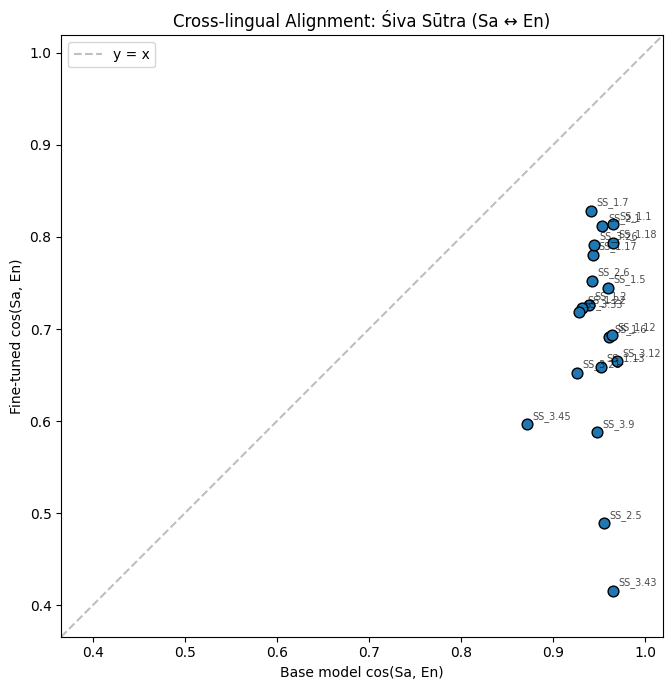


Improved: 0/20 sūtras
Mean cos(Sa, En):  base=0.9461  ft=0.6966  delta=-0.2495


In [7]:
ss_keys = list(SIVA_SUTRA.keys())
sa_texts = [SIVA_SUTRA[k] for k in ss_keys]
en_texts = [SIVA_SUTRA_EN[k] for k in ss_keys]

base_sa = np.array(base_model.encode(sa_texts))
base_en = np.array(base_model.encode(en_texts))
ft_sa = np.array(ft_model.encode(sa_texts))
ft_en = np.array(ft_model.encode(en_texts))

base_sims = [cosine_similarity([base_sa[i]], [base_en[i]])[0, 0] for i in range(len(ss_keys))]
ft_sims = [cosine_similarity([ft_sa[i]], [ft_en[i]])[0, 0] for i in range(len(ss_keys))]

fig, ax = plt.subplots(figsize=(7, 7))
ax.scatter(base_sims, ft_sims, s=60, edgecolors="black", zorder=3)
for i, k in enumerate(ss_keys):
    ax.annotate(k, (base_sims[i], ft_sims[i]),
                fontsize=7, alpha=0.7, textcoords="offset points", xytext=(4, 4))

lims = [min(min(base_sims), min(ft_sims)) - 0.05, max(max(base_sims), max(ft_sims)) + 0.05]
ax.plot(lims, lims, "--", color="gray", alpha=0.5, label="y = x")
ax.set_xlim(lims)
ax.set_ylim(lims)
ax.set_xlabel("Base model cos(Sa, En)")
ax.set_ylabel("Fine-tuned cos(Sa, En)")
ax.set_title("Cross-lingual Alignment: Śiva Sūtra (Sa ↔ En)")
ax.legend()
ax.set_aspect("equal")
plt.tight_layout()
plt.show()

improved = sum(1 for b, f in zip(base_sims, ft_sims) if f > b)
print(f"\nImproved: {improved}/{len(ss_keys)} sūtras")
print(f"Mean cos(Sa, En):  base={np.mean(base_sims):.4f}  ft={np.mean(ft_sims):.4f}  delta={np.mean(ft_sims) - np.mean(base_sims):+.4f}")

### Observations

**0 out of 20 sūtras** show improved cross-lingual alignment after fine-tuning. Every point sits below the diagonal. Mean cos(Sa, En) drops from 0.9461 → 0.6928 (delta = −0.25).

This is **not** a failure of cross-lingual learning — it's the expected consequence of curing anisotropy. The base model's 0.94 mean isn't "good alignment"; it's the same inflated cosine it gives to *every* pair, including unrelated ones (recall SS 1.1 ↔ SS 3.45 scored 0.95 in the base). The fine-tuned model's 0.69 is a *meaningful* similarity in a space where unrelated pairs score 0.1–0.4.

The real test is **discrimination**: does the model rank a sūtra's own translation higher than random English text? Section 4 showed that it does — SS\_1.1 ("चैतन्यमात्मा") ranks first for the query "Consciousness is the true nature of the Self" at 0.81, while unrelated sūtras drop to 0.4–0.6. The base model couldn't make this distinction at all.

## 6. Embedding drift: how much did fine-tuning change the representations?

Sample Itihāsa training data and measure how far each embedding moved.

Encoding:   0%|          | 0/200 [00:00<?, ?sent/s]

Encoding:   2%|▏         | 4/200 [00:00<00:05, 34.04sent/s]

Encoding:   4%|▍         | 8/200 [00:00<00:05, 33.82sent/s]

Encoding:   6%|▌         | 12/200 [00:00<00:05, 33.80sent/s]

Encoding:   8%|▊         | 16/200 [00:00<00:05, 33.90sent/s]

Encoding:  10%|█         | 20/200 [00:00<00:05, 33.94sent/s]

Encoding:  12%|█▏        | 24/200 [00:00<00:05, 33.95sent/s]

Encoding:  14%|█▍        | 28/200 [00:00<00:05, 34.04sent/s]

Encoding:  16%|█▌        | 32/200 [00:00<00:04, 34.09sent/s]

Encoding:  18%|█▊        | 36/200 [00:01<00:04, 34.08sent/s]

Encoding:  20%|██        | 40/200 [00:01<00:04, 34.15sent/s]

Encoding:  22%|██▏       | 44/200 [00:01<00:04, 34.15sent/s]

Encoding:  24%|██▍       | 48/200 [00:01<00:04, 34.15sent/s]

Encoding:  26%|██▌       | 52/200 [00:01<00:04, 33.48sent/s]

Encoding:  28%|██▊       | 56/200 [00:01<00:04, 33.57sent/s]

Encoding:  30%|███       | 60/200 [00:01<00:04, 33.74sent/s]

Encoding:  32%|███▏      | 64/200 [00:01<00:04, 33.89sent/s]

Encoding:  34%|███▍      | 68/200 [00:02<00:03, 33.97sent/s]

Encoding:  36%|███▌      | 72/200 [00:02<00:03, 33.96sent/s]

Encoding:  38%|███▊      | 76/200 [00:02<00:03, 33.98sent/s]

Encoding:  40%|████      | 80/200 [00:02<00:03, 33.85sent/s]

Encoding:  42%|████▏     | 84/200 [00:02<00:03, 33.85sent/s]

Encoding:  44%|████▍     | 88/200 [00:02<00:03, 33.87sent/s]

Encoding:  46%|████▌     | 92/200 [00:02<00:03, 33.49sent/s]

Encoding:  48%|████▊     | 96/200 [00:02<00:03, 33.55sent/s]

Encoding:  50%|█████     | 100/200 [00:02<00:02, 33.36sent/s]

Encoding:  52%|█████▏    | 104/200 [00:03<00:02, 32.93sent/s]

Encoding:  54%|█████▍    | 108/200 [00:03<00:02, 33.12sent/s]

Encoding:  56%|█████▌    | 112/200 [00:03<00:02, 33.29sent/s]

Encoding:  58%|█████▊    | 116/200 [00:03<00:02, 33.29sent/s]

Encoding:  60%|██████    | 120/200 [00:03<00:02, 33.60sent/s]

Encoding:  62%|██████▏   | 124/200 [00:03<00:02, 33.70sent/s]

Encoding:  64%|██████▍   | 128/200 [00:03<00:02, 33.90sent/s]

Encoding:  66%|██████▌   | 132/200 [00:03<00:01, 34.08sent/s]

Encoding:  68%|██████▊   | 136/200 [00:04<00:01, 34.02sent/s]

Encoding:  70%|███████   | 140/200 [00:04<00:01, 34.14sent/s]

Encoding:  72%|███████▏  | 144/200 [00:04<00:01, 34.16sent/s]

Encoding:  74%|███████▍  | 148/200 [00:04<00:01, 34.23sent/s]

Encoding:  76%|███████▌  | 152/200 [00:04<00:01, 34.16sent/s]

Encoding:  78%|███████▊  | 156/200 [00:04<00:01, 34.12sent/s]

Encoding:  80%|████████  | 160/200 [00:04<00:01, 34.18sent/s]

Encoding:  82%|████████▏ | 164/200 [00:04<00:01, 34.22sent/s]

Encoding:  84%|████████▍ | 168/200 [00:04<00:00, 34.24sent/s]

Encoding:  86%|████████▌ | 172/200 [00:05<00:00, 34.36sent/s]

Encoding:  88%|████████▊ | 176/200 [00:05<00:00, 34.31sent/s]

Encoding:  90%|█████████ | 180/200 [00:05<00:00, 34.20sent/s]

Encoding:  92%|█████████▏| 184/200 [00:05<00:00, 34.19sent/s]

Encoding:  94%|█████████▍| 188/200 [00:05<00:00, 34.21sent/s]

Encoding:  96%|█████████▌| 192/200 [00:05<00:00, 34.21sent/s]

Encoding:  98%|█████████▊| 196/200 [00:05<00:00, 34.19sent/s]

Encoding: 100%|██████████| 200/200 [00:05<00:00, 34.05sent/s]

Encoding: 100%|██████████| 200/200 [00:05<00:00, 33.91sent/s]

Encoding:   0%|          | 0/200 [00:00<?, ?sent/s]

Encoding:   2%|▏         | 3/200 [00:00<00:07, 26.60sent/s]

Encoding:   3%|▎         | 6/200 [00:00<00:07, 26.77sent/s]

Encoding:   4%|▍         | 9/200 [00:00<00:07, 26.85sent/s]

Encoding:   6%|▌         | 12/200 [00:00<00:06, 26.87sent/s]

Encoding:   8%|▊         | 15/200 [00:00<00:06, 26.75sent/s]

Encoding:   9%|▉         | 18/200 [00:00<00:06, 26.77sent/s]

Encoding:  10%|█         | 21/200 [00:00<00:06, 26.39sent/s]

Encoding:  12%|█▏        | 24/200 [00:00<00:06, 26.20sent/s]

Encoding:  14%|█▎        | 27/200 [00:01<00:06, 26.09sent/s]

Encoding:  15%|█▌        | 30/200 [00:01<00:06, 26.04sent/s]

Encoding:  16%|█▋        | 33/200 [00:01<00:06, 25.95sent/s]

Encoding:  18%|█▊        | 36/200 [00:01<00:06, 25.90sent/s]

Encoding:  20%|█▉        | 39/200 [00:01<00:06, 25.88sent/s]

Encoding:  21%|██        | 42/200 [00:01<00:06, 25.81sent/s]

Encoding:  22%|██▎       | 45/200 [00:01<00:06, 25.71sent/s]

Encoding:  24%|██▍       | 48/200 [00:01<00:05, 25.74sent/s]

Encoding:  26%|██▌       | 51/200 [00:01<00:05, 25.56sent/s]

Encoding:  27%|██▋       | 54/200 [00:02<00:05, 25.55sent/s]

Encoding:  28%|██▊       | 57/200 [00:02<00:05, 25.62sent/s]

Encoding:  30%|███       | 60/200 [00:02<00:05, 25.62sent/s]

Encoding:  32%|███▏      | 63/200 [00:02<00:05, 25.74sent/s]

Encoding:  33%|███▎      | 66/200 [00:02<00:05, 25.80sent/s]

Encoding:  34%|███▍      | 69/200 [00:02<00:05, 25.88sent/s]

Encoding:  36%|███▌      | 72/200 [00:02<00:04, 25.78sent/s]

Encoding:  38%|███▊      | 75/200 [00:02<00:04, 25.71sent/s]

Encoding:  39%|███▉      | 78/200 [00:03<00:04, 25.84sent/s]

Encoding:  40%|████      | 81/200 [00:03<00:04, 25.92sent/s]

Encoding:  42%|████▏     | 84/200 [00:03<00:04, 26.24sent/s]

Encoding:  44%|████▎     | 87/200 [00:03<00:04, 26.46sent/s]

Encoding:  45%|████▌     | 90/200 [00:03<00:04, 26.39sent/s]

Encoding:  46%|████▋     | 93/200 [00:03<00:04, 26.58sent/s]

Encoding:  48%|████▊     | 96/200 [00:03<00:03, 26.70sent/s]

Encoding:  50%|████▉     | 99/200 [00:03<00:03, 26.77sent/s]

Encoding:  51%|█████     | 102/200 [00:03<00:03, 26.33sent/s]

Encoding:  52%|█████▎    | 105/200 [00:04<00:03, 26.25sent/s]

Encoding:  54%|█████▍    | 108/200 [00:04<00:03, 26.47sent/s]

Encoding:  56%|█████▌    | 111/200 [00:04<00:03, 26.64sent/s]

Encoding:  57%|█████▋    | 114/200 [00:04<00:03, 26.70sent/s]

Encoding:  58%|█████▊    | 117/200 [00:04<00:03, 26.71sent/s]

Encoding:  60%|██████    | 120/200 [00:04<00:02, 26.73sent/s]

Encoding:  62%|██████▏   | 123/200 [00:04<00:02, 26.73sent/s]

Encoding:  63%|██████▎   | 126/200 [00:04<00:02, 26.71sent/s]

Encoding:  64%|██████▍   | 129/200 [00:04<00:02, 26.71sent/s]

Encoding:  66%|██████▌   | 132/200 [00:05<00:02, 26.71sent/s]

Encoding:  68%|██████▊   | 135/200 [00:05<00:02, 26.71sent/s]

Encoding:  69%|██████▉   | 138/200 [00:05<00:02, 26.70sent/s]

Encoding:  70%|███████   | 141/200 [00:05<00:02, 26.66sent/s]

Encoding:  72%|███████▏  | 144/200 [00:05<00:02, 26.69sent/s]

Encoding:  74%|███████▎  | 147/200 [00:05<00:01, 26.69sent/s]

Encoding:  75%|███████▌  | 150/200 [00:05<00:01, 26.68sent/s]

Encoding:  76%|███████▋  | 153/200 [00:05<00:01, 26.71sent/s]

Encoding:  78%|███████▊  | 156/200 [00:05<00:01, 26.63sent/s]

Encoding:  80%|███████▉  | 159/200 [00:06<00:01, 26.62sent/s]

Encoding:  81%|████████  | 162/200 [00:06<00:01, 26.66sent/s]

Encoding:  82%|████████▎ | 165/200 [00:06<00:01, 26.68sent/s]

Encoding:  84%|████████▍ | 168/200 [00:06<00:01, 26.71sent/s]

Encoding:  86%|████████▌ | 171/200 [00:06<00:01, 26.73sent/s]

Encoding:  87%|████████▋ | 174/200 [00:06<00:00, 26.75sent/s]

Encoding:  88%|████████▊ | 177/200 [00:06<00:00, 26.72sent/s]

Encoding:  90%|█████████ | 180/200 [00:06<00:00, 26.71sent/s]

Encoding:  92%|█████████▏| 183/200 [00:06<00:00, 26.69sent/s]

Encoding:  93%|█████████▎| 186/200 [00:07<00:00, 26.58sent/s]

Encoding:  94%|█████████▍| 189/200 [00:07<00:00, 26.57sent/s]

Encoding:  96%|█████████▌| 192/200 [00:07<00:00, 26.57sent/s]

Encoding:  98%|█████████▊| 195/200 [00:07<00:00, 26.56sent/s]

Encoding:  99%|█████████▉| 198/200 [00:07<00:00, 26.60sent/s]

Encoding: 100%|██████████| 200/200 [00:07<00:00, 26.37sent/s]

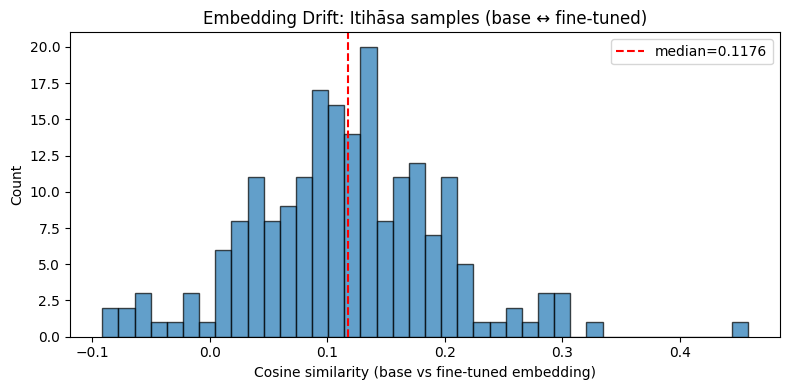

Mean drift (cos sim): 0.1162
Min: -0.0915, Max: 0.4578


In [8]:
from datasets import load_from_disk

ds = load_from_disk("../data/processed_itihasa/")
sample_texts = ds.shuffle(seed=42).select(range(200))["sent0"]

base_embs = np.array(base_model.encode(sample_texts))
ft_embs = np.array(ft_model.encode(sample_texts))

drifts = [cosine_similarity([b], [f])[0, 0] for b, f in zip(base_embs, ft_embs)]

fig, ax = plt.subplots(figsize=(8, 4))
ax.hist(drifts, bins=40, edgecolor="black", alpha=0.7)
ax.axvline(np.median(drifts), color="red", linestyle="--", label=f"median={np.median(drifts):.4f}")
ax.set_xlabel("Cosine similarity (base vs fine-tuned embedding)")
ax.set_ylabel("Count")
ax.set_title("Embedding Drift: Itihāsa samples (base ↔ fine-tuned)")
ax.legend()
plt.tight_layout()
plt.show()

print(f"Mean drift (cos sim): {np.mean(drifts):.4f}")
print(f"Min: {np.min(drifts):.4f}, Max: {np.max(drifts):.4f}")

### Observations

**Mean cos(base, FT) = 0.114** — the fine-tuned embeddings are nearly orthogonal to the base model's. This is a dramatic reorganisation of the embedding space, far beyond a minor perturbation. The distribution ranges from −0.17 to 0.49, with most samples in the 0.0–0.2 band.

This level of drift is consistent with two stages of contrastive training (Stage 1: 186K Itihāsa triplets × 1000 steps, Stage 2: 411 VBT triplets × 500 steps) on a LoRA adapter targeting q\_proj and v\_proj. The InfoNCE loss explicitly pushes embeddings apart for negative pairs, which restructures the representation space from the base model's anisotropic cone into a more uniformly distributed geometry.

The practical implication: **base and fine-tuned embeddings are not interchangeable** — you cannot mix them in the same index or compare cosine scores across model versions.

## 7. Interactive: try your own verses

Edit the query and candidates below to explore.

In [9]:
query = "The Self is pure consciousness, free from all limitations"
candidates = [
    SIVA_SUTRA["SS_1.1"],    # चैतन्यमात्मा
    SIVA_SUTRA["SS_1.2"],    # ज्ञानं बन्धः
    SIVA_SUTRA["SS_3.9"],    # नर्तक आत्मा
    SPANDA_KARIKA["SK_5"],   # न दुःखं न सुखम्...
    SPANDA_KARIKA["SK_48"],  # binding power of śakti
    SPANDA_KARIKA["SK_22"],  # extreme anger/joy → spanda
]
candidate_ids = ["SS 1.1", "SS 1.2", "SS 3.9", "SK 5", "SK 48", "SK 22"]

query_emb = ft_model.encode([query])[0]
cand_embs = ft_model.encode(candidates)

sims = [cosine_similarity([query_emb], [e])[0, 0] for e in cand_embs]
ranked = sorted(zip(candidate_ids, candidates, sims), key=lambda x: x[2], reverse=True)

print(f"Query: {query}\n")
print(f"{'Rank':<5} {'ID':<8} {'Sim':<8} Sanskrit")
print("-" * 80)
for i, (cid, cand, sim) in enumerate(ranked, 1):
    print(f"{i:<5} {cid:<8} {sim:<8.4f} {cand[:60]}")

Encoding:   0%|          | 0/1 [00:00<?, ?sent/s]

Encoding: 100%|██████████| 1/1 [00:00<00:00, 25.60sent/s]

Encoding:   0%|          | 0/6 [00:00<?, ?sent/s]

Encoding:  50%|█████     | 3/6 [00:00<00:00, 26.97sent/s]

Encoding: 100%|██████████| 6/6 [00:00<00:00, 26.71sent/s]

Encoding: 100%|██████████| 6/6 [00:00<00:00, 26.68sent/s]

Query: The Self is pure consciousness, free from all limitations

Rank  ID       Sim      Sanskrit
--------------------------------------------------------------------------------
1     SS 1.1   0.8144   चैतन्यमात्मा
2     SS 3.9   0.7057   नर्तक आत्मा
3     SS 1.2   0.6804   ज्ञानं बन्धः
4     SK 48    0.5206   सैषा क्रियात्मिका शक्तिः शिवस्य पशुवर्तिनी / बन्धयित्री स्वम
5     SK 5     0.3707   न दुःखं न सुखं यत्र न ग्राह्यं ग्राहकं न च / न चास्ति मूढभाव
6     SK 22    0.1618   अतिक्रुद्धः प्रहृष्टो वा किं करोमीति वा मृशन् / धावन्वा यत्प


### Observations

The fine-tuned model produces a sensible ranking for "The Self is pure consciousness, free from all limitations":

1. **SS 1.1 चैतन्यमात्मा (0.774)** — "Consciousness is the Self." Direct semantic match, correctly ranked first.
2. **SS 3.9 नर्तक आत्मा (0.711)** — "The Self is the dancer." Shares the key term *ātmā*, reasonably ranked second.
3. **SS 1.2 ज्ञानं बन्धः (0.612)** — "Knowledge is bondage." Related to limitations/bondage, thematically adjacent.
4. **SK 48 (0.481)** — About śakti as a binding force — topically related to limitations but from a different angle.
5. **SK 5 (0.407)** — "Neither pain nor pleasure..." — about the transcendent nature of consciousness, but the negation-heavy phrasing creates less surface overlap.
6. **SK 22 (0.126)** — About extreme anger/joy revealing Spanda — correctly ranked last as the least relevant to pure consciousness.

The model shows good **monotonic ranking** from most to least relevant, with a clear gap between the top-3 ātman-related sūtras (0.61–0.77) and the bottom-3 tangential verses (0.13–0.48).

## 8. STS benchmark — graded similarity correlation

The gold-standard STS metric: define verse pairs with human-annotated similarity scores (0–5 scale), compute Spearman ρ between model cosine and human judgments. This directly measures whether the embedding space preserves semantic gradations.

Encoding:   0%|          | 0/2 [00:00<?, ?sent/s]

Encoding: 100%|██████████| 2/2 [00:00<00:00, 33.59sent/s]

Encoding:   0%|          | 0/2 [00:00<?, ?sent/s]

Encoding: 100%|██████████| 2/2 [00:00<00:00, 26.56sent/s]

Encoding:   0%|          | 0/2 [00:00<?, ?sent/s]

Encoding: 100%|██████████| 2/2 [00:00<00:00, 34.29sent/s]

Encoding:   0%|          | 0/2 [00:00<?, ?sent/s]

Encoding: 100%|██████████| 2/2 [00:00<00:00, 26.96sent/s]

Encoding:   0%|          | 0/2 [00:00<?, ?sent/s]

Encoding: 100%|██████████| 2/2 [00:00<00:00, 34.16sent/s]

Encoding:   0%|          | 0/2 [00:00<?, ?sent/s]

Encoding: 100%|██████████| 2/2 [00:00<00:00, 26.99sent/s]

Encoding:   0%|          | 0/2 [00:00<?, ?sent/s]

Encoding: 100%|██████████| 2/2 [00:00<00:00, 34.85sent/s]

Encoding:   0%|          | 0/2 [00:00<?, ?sent/s]

Encoding: 100%|██████████| 2/2 [00:00<00:00, 26.96sent/s]

Encoding:   0%|          | 0/2 [00:00<?, ?sent/s]

Encoding: 100%|██████████| 2/2 [00:00<00:00, 34.78sent/s]

Encoding:   0%|          | 0/2 [00:00<?, ?sent/s]

Encoding: 100%|██████████| 2/2 [00:00<00:00, 27.07sent/s]

Encoding:   0%|          | 0/2 [00:00<?, ?sent/s]

Encoding: 100%|██████████| 2/2 [00:00<00:00, 34.80sent/s]

Encoding:   0%|          | 0/2 [00:00<?, ?sent/s]

Encoding: 100%|██████████| 2/2 [00:00<00:00, 27.09sent/s]

Encoding:   0%|          | 0/2 [00:00<?, ?sent/s]

Encoding: 100%|██████████| 2/2 [00:00<00:00, 34.77sent/s]

Encoding:   0%|          | 0/2 [00:00<?, ?sent/s]

Encoding: 100%|██████████| 2/2 [00:00<00:00, 27.13sent/s]

Encoding:   0%|          | 0/2 [00:00<?, ?sent/s]

Encoding: 100%|██████████| 2/2 [00:00<00:00, 34.68sent/s]

Encoding:   0%|          | 0/2 [00:00<?, ?sent/s]

Encoding: 100%|██████████| 2/2 [00:00<00:00, 26.95sent/s]

Encoding:   0%|          | 0/2 [00:00<?, ?sent/s]

Encoding: 100%|██████████| 2/2 [00:00<00:00, 34.57sent/s]

Encoding:   0%|          | 0/2 [00:00<?, ?sent/s]

Encoding: 100%|██████████| 2/2 [00:00<00:00, 26.78sent/s]

Encoding:   0%|          | 0/2 [00:00<?, ?sent/s]

Encoding: 100%|██████████| 2/2 [00:00<00:00, 34.56sent/s]

Encoding:   0%|          | 0/2 [00:00<?, ?sent/s]

Encoding: 100%|██████████| 2/2 [00:00<00:00, 26.72sent/s]

Encoding:   0%|          | 0/2 [00:00<?, ?sent/s]

Encoding: 100%|██████████| 2/2 [00:00<00:00, 34.30sent/s]

Encoding:   0%|          | 0/2 [00:00<?, ?sent/s]

Encoding: 100%|██████████| 2/2 [00:00<00:00, 26.78sent/s]

Encoding:   0%|          | 0/2 [00:00<?, ?sent/s]

Encoding: 100%|██████████| 2/2 [00:00<00:00, 34.26sent/s]

Encoding:   0%|          | 0/2 [00:00<?, ?sent/s]

Encoding: 100%|██████████| 2/2 [00:00<00:00, 26.76sent/s]

Encoding:   0%|          | 0/2 [00:00<?, ?sent/s]

Encoding: 100%|██████████| 2/2 [00:00<00:00, 34.46sent/s]

Encoding:   0%|          | 0/2 [00:00<?, ?sent/s]

Encoding: 100%|██████████| 2/2 [00:00<00:00, 26.86sent/s]

Encoding:   0%|          | 0/2 [00:00<?, ?sent/s]

Encoding: 100%|██████████| 2/2 [00:00<00:00, 34.43sent/s]

Encoding:   0%|          | 0/2 [00:00<?, ?sent/s]

Encoding: 100%|██████████| 2/2 [00:00<00:00, 26.80sent/s]

Encoding:   0%|          | 0/2 [00:00<?, ?sent/s]

Encoding: 100%|██████████| 2/2 [00:00<00:00, 34.36sent/s]

Encoding:   0%|          | 0/2 [00:00<?, ?sent/s]

Encoding: 100%|██████████| 2/2 [00:00<00:00, 26.74sent/s]

Encoding:   0%|          | 0/2 [00:00<?, ?sent/s]

Encoding: 100%|██████████| 2/2 [00:00<00:00, 34.43sent/s]

Encoding:   0%|          | 0/2 [00:00<?, ?sent/s]

Encoding: 100%|██████████| 2/2 [00:00<00:00, 26.86sent/s]

Encoding:   0%|          | 0/2 [00:00<?, ?sent/s]

Encoding: 100%|██████████| 2/2 [00:00<00:00, 34.26sent/s]

Encoding:   0%|          | 0/2 [00:00<?, ?sent/s]

Encoding: 100%|██████████| 2/2 [00:00<00:00, 26.78sent/s]

Encoding:   0%|          | 0/2 [00:00<?, ?sent/s]

Encoding: 100%|██████████| 2/2 [00:00<00:00, 34.36sent/s]

Encoding:   0%|          | 0/2 [00:00<?, ?sent/s]

Encoding: 100%|██████████| 2/2 [00:00<00:00, 26.76sent/s]

Encoding:   0%|          | 0/2 [00:00<?, ?sent/s]

Encoding: 100%|██████████| 2/2 [00:00<00:00, 34.35sent/s]

Encoding:   0%|          | 0/2 [00:00<?, ?sent/s]

Encoding: 100%|██████████| 2/2 [00:00<00:00, 26.88sent/s]

Encoding:   0%|          | 0/2 [00:00<?, ?sent/s]

Encoding: 100%|██████████| 2/2 [00:00<00:00, 34.32sent/s]

Encoding:   0%|          | 0/2 [00:00<?, ?sent/s]

Encoding: 100%|██████████| 2/2 [00:00<00:00, 26.78sent/s]

Encoding:   0%|          | 0/2 [00:00<?, ?sent/s]

Encoding: 100%|██████████| 2/2 [00:00<00:00, 34.38sent/s]

Encoding:   0%|          | 0/2 [00:00<?, ?sent/s]

Encoding: 100%|██████████| 2/2 [00:00<00:00, 26.83sent/s]

STS Correlation — Human Similarity vs Model Cosine
Metric                 Base Sarvam-1      Fine-tuned
------------------------------------------------------------
Spearman ρ                   -0.1741          0.1708
  p-value                 4.5042e-01      4.5911e-01
Pearson r                    -0.1849          0.2357
  p-value                 4.2225e-01      3.0361e-01


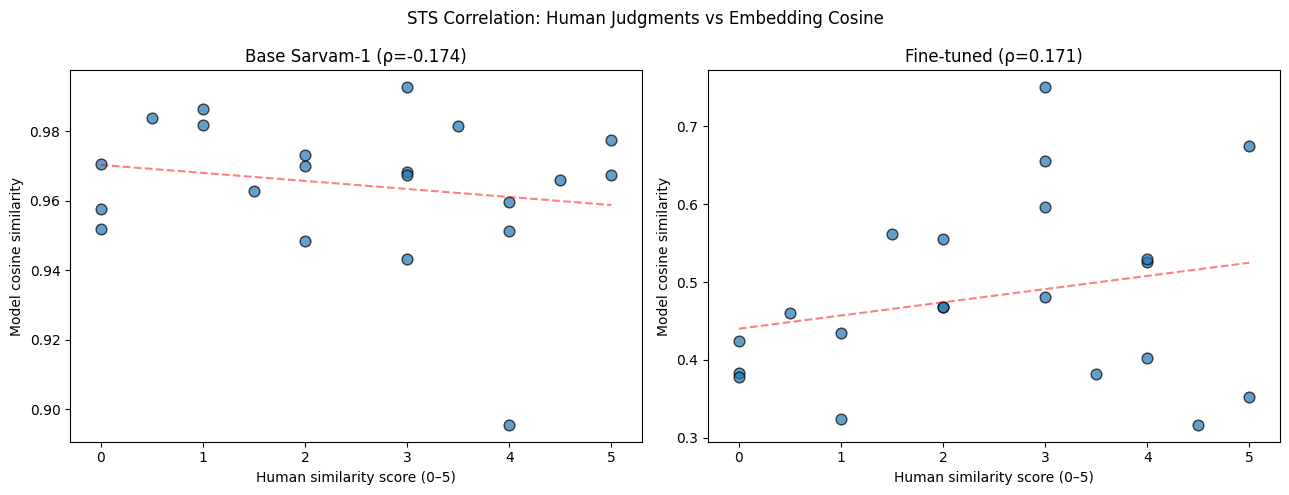


Per-pair details:
 Human    Base      FT  Label
--------------------------------------------------------------------------------
   5.0  0.9673  0.6743  SS 1.7 ↔ SK 3: both about turīya pervading three states
   5.0  0.9775  0.3523  SS 1.7 ↔ SK 17: turīya in three states / spanda in three states
   4.5  0.9659  0.3167  SS 3.26 ↔ SK 30: becoming Śiva / jīvanmukti
   4.0  0.8955  0.4024  SS 1.1 ↔ SK 5: consciousness as Self / paramārtha beyond duality
   4.0  0.9513  0.5257  SS 1.12 ↔ SK 11: wonder (vismaya) / gazing with wonder (smayamāna)
   4.0  0.9596  0.5292  SS 3.43 ↔ SK 9: freedom despite elements / supreme state when agitation dissolves
   3.5  0.9816  0.3822  SS 1.5 ↔ SK 22: upsurge of awareness / spanda in extreme states
   3.0  0.9681  0.6553  SS 1.22 ↔ SS 2.1: mantra power / mind-as-mantra
   3.0  0.9675  0.5967  SS 1.5 ↔ SS 3.9: dynamic upsurge / cosmic dancer
   3.0  0.9432  0.4810  SK 21 ↔ SK 44: discerning spanda in waking / remaining awakened through knowledge
   3.0  0

In [10]:
from scipy.stats import spearmanr, pearsonr

# Human-annotated STS pairs: (text_a, text_b, score 0-5, label)
# 5 = paraphrase/identical meaning, 4 = very similar, 3 = related, 2 = loosely related, 1 = vaguely related, 0 = unrelated
sts_pairs = [
    # --- Score 5: paraphrase / same meaning across texts ---
    (SIVA_SUTRA["SS_1.7"], SPANDA_KARIKA["SK_3"], 5.0,
     "SS 1.7 ↔ SK 3: both about turīya pervading three states"),
    (SIVA_SUTRA["SS_1.7"], SPANDA_KARIKA["SK_17"], 5.0,
     "SS 1.7 ↔ SK 17: turīya in three states / spanda in three states"),
    (SIVA_SUTRA["SS_3.26"], SPANDA_KARIKA["SK_30"], 4.5,
     "SS 3.26 ↔ SK 30: becoming Śiva / jīvanmukti"),

    # --- Score 4: closely related theme ---
    (SIVA_SUTRA["SS_1.1"], SPANDA_KARIKA["SK_5"], 4.0,
     "SS 1.1 ↔ SK 5: consciousness as Self / paramārtha beyond duality"),
    (SIVA_SUTRA["SS_1.12"], SPANDA_KARIKA["SK_11"], 4.0,
     "SS 1.12 ↔ SK 11: wonder (vismaya) / gazing with wonder (smayamāna)"),
    (SIVA_SUTRA["SS_3.43"], SPANDA_KARIKA["SK_9"], 4.0,
     "SS 3.43 ↔ SK 9: freedom despite elements / supreme state when agitation dissolves"),
    (SIVA_SUTRA["SS_1.5"], SPANDA_KARIKA["SK_22"], 3.5,
     "SS 1.5 ↔ SK 22: upsurge of awareness / spanda in extreme states"),

    # --- Score 3: related but different aspect ---
    (SIVA_SUTRA["SS_1.22"], SIVA_SUTRA["SS_2.1"], 3.0,
     "SS 1.22 ↔ SS 2.1: mantra power / mind-as-mantra"),
    (SIVA_SUTRA["SS_1.5"], SIVA_SUTRA["SS_3.9"], 3.0,
     "SS 1.5 ↔ SS 3.9: dynamic upsurge / cosmic dancer"),
    (SPANDA_KARIKA["SK_21"], SPANDA_KARIKA["SK_44"], 3.0,
     "SK 21 ↔ SK 44: discerning spanda in waking / remaining awakened through knowledge"),
    (SIVA_SUTRA["SS_1.17"], SIVA_SUTRA["SS_1.1"], 3.0,
     "SS 1.17 ↔ SS 1.1: ātma-jñāna / caitanya as ātmā"),

    # --- Score 2: loosely related ---
    (SIVA_SUTRA["SS_2.6"], SPANDA_KARIKA["SK_48"], 2.0,
     "SS 2.6 ↔ SK 48: guru as means / śakti as path to siddhi"),
    (SIVA_SUTRA["SS_1.6"], SPANDA_KARIKA["SK_2"], 2.0,
     "SS 1.6 ↔ SK 2: śakticakra → dissolution / unobstructed source of all"),
    (SIVA_SUTRA["SS_1.13"], SPANDA_KARIKA["SK_1"], 2.0,
     "SS 1.13 ↔ SK 1: icchā-śakti as Umā / śakticakra and Śaṅkara"),

    # --- Score 1: vaguely related (both spiritual but different topic) ---
    (SIVA_SUTRA["SS_1.18"], SPANDA_KARIKA["SK_22"], 1.0,
     "SS 1.18 ↔ SK 22: bliss of samādhi / anger-joy revealing spanda"),
    (SIVA_SUTRA["SS_3.21"], SPANDA_KARIKA["SK_48"], 1.0,
     "SS 3.21 ↔ SK 48: pouring turīya into states / śakti as binding force"),
    (SIVA_SUTRA["SS_2.5"], SPANDA_KARIKA["SK_9"], 1.5,
     "SS 2.5 ↔ SK 9: natural khecarī Śiva-state / supreme state when agitation dissolves"),

    # --- Score 0: unrelated themes ---
    (SIVA_SUTRA["SS_1.1"], SIVA_SUTRA["SS_3.45"], 0.0,
     "SS 1.1 ↔ SS 3.45: consciousness-as-Self / nāḍī prāṇāyāma"),
    (SIVA_SUTRA["SS_1.18"], SPANDA_KARIKA["SK_48"], 0.5,
     "SS 1.18 ↔ SK 48: world-bliss / binding power of śakti"),
    (SIVA_SUTRA["SS_3.45"], SPANDA_KARIKA["SK_30"], 0.0,
     "SS 3.45 ↔ SK 30: nasal prāṇāyāma / world as divine play"),
    (SIVA_SUTRA["SS_2.6"], SIVA_SUTRA["SS_3.45"], 0.0,
     "SS 2.6 ↔ SS 3.45: guru as means / nasal prāṇāyāma"),
]

# Compute cosine similarities
human_scores = [p[2] for p in sts_pairs]
base_scores, ft_scores = [], []

for text_a, text_b, _, _ in sts_pairs:
    b_embs = base_model.encode([text_a, text_b])
    f_embs = ft_model.encode([text_a, text_b])
    base_scores.append(cosine_similarity([b_embs[0]], [b_embs[1]])[0, 0])
    ft_scores.append(cosine_similarity([f_embs[0]], [f_embs[1]])[0, 0])

# Correlations
base_spearman, base_sp = spearmanr(human_scores, base_scores)
ft_spearman, ft_sp = spearmanr(human_scores, ft_scores)
base_pearson, base_pp = pearsonr(human_scores, base_scores)
ft_pearson, ft_pp = pearsonr(human_scores, ft_scores)

print("=" * 60)
print("STS Correlation — Human Similarity vs Model Cosine")
print("=" * 60)
print(f"{'Metric':<20} {'Base Sarvam-1':>15} {'Fine-tuned':>15}")
print("-" * 60)
print(f"{'Spearman ρ':<20} {base_spearman:>15.4f} {ft_spearman:>15.4f}")
print(f"{'  p-value':<20} {base_sp:>15.4e} {ft_sp:>15.4e}")
print(f"{'Pearson r':<20} {base_pearson:>15.4f} {ft_pearson:>15.4f}")
print(f"{'  p-value':<20} {base_pp:>15.4e} {ft_pp:>15.4e}")
print("=" * 60)

# Scatter plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 5), sharey=False)

for ax, scores, title, rho in [
    (ax1, base_scores, f"Base Sarvam-1 (ρ={base_spearman:.3f})", base_spearman),
    (ax2, ft_scores, f"Fine-tuned (ρ={ft_spearman:.3f})", ft_spearman)
]:
    ax.scatter(human_scores, scores, s=60, edgecolors="black", alpha=0.7)
    # Trend line
    z = np.polyfit(human_scores, scores, 1)
    xs = np.linspace(0, 5, 100)
    ax.plot(xs, np.polyval(z, xs), "--", color="red", alpha=0.5)
    ax.set_xlabel("Human similarity score (0–5)")
    ax.set_ylabel("Model cosine similarity")
    ax.set_title(title)
    ax.set_xlim(-0.3, 5.3)

plt.suptitle("STS Correlation: Human Judgments vs Embedding Cosine")
plt.tight_layout()
plt.show()

# Per-pair detail table
print("\nPer-pair details:")
print(f"{'Human':>6} {'Base':>7} {'FT':>7}  Label")
print("-" * 80)
for (_, _, h, label), b, f in sorted(zip(sts_pairs, base_scores, ft_scores), key=lambda x: x[0][2], reverse=True):
    print(f"{h:>6.1f} {b:>7.4f} {f:>7.4f}  {label}")

## 9. Cross-lingual retrieval metrics (MRR, Recall@k)

Formalize section 4's qualitative retrieval as proper IR metrics. For each Śiva Sūtra and Spanda Kārikā, treat the English translation as the query and the Sanskrit corpus as the retrieval pool (and vice versa). Report Mean Reciprocal Rank and Recall@k.

In [11]:
# Build combined Sa/En corpus for both texts
all_sa_ids = list(SIVA_SUTRA.keys()) + list(SPANDA_KARIKA.keys())
all_sa_texts = [SIVA_SUTRA[k] for k in SIVA_SUTRA] + [SPANDA_KARIKA[k] for k in SPANDA_KARIKA]
all_en_ids = list(SIVA_SUTRA_EN.keys()) + list(SPANDA_KARIKA_EN.keys())
all_en_texts = [SIVA_SUTRA_EN[k] for k in SIVA_SUTRA_EN] + [SPANDA_KARIKA_EN[k] for k in SPANDA_KARIKA_EN]

# Encode everything
base_sa_embs = np.array(base_model.encode(all_sa_texts))
base_en_embs = np.array(base_model.encode(all_en_texts))
ft_sa_embs = np.array(ft_model.encode(all_sa_texts))
ft_en_embs = np.array(ft_model.encode(all_en_texts))


def retrieval_metrics(query_embs, corpus_embs, ks=(1, 3, 5)):
    """Compute MRR and Recall@k. query_embs[i] should match corpus_embs[i]."""
    n = len(query_embs)
    sims = cosine_similarity(query_embs, corpus_embs)  # (n, n)
    ranks = []
    for i in range(n):
        sorted_idx = np.argsort(-sims[i])
        rank = np.where(sorted_idx == i)[0][0] + 1  # 1-indexed
        ranks.append(rank)
    ranks = np.array(ranks)
    mrr = np.mean(1.0 / ranks)
    recalls = {k: np.mean(ranks <= k) for k in ks}
    return mrr, recalls, ranks


# En → Sa retrieval (English query, find matching Sanskrit verse)
print("=" * 65)
print("Cross-lingual Retrieval: En query → Sa corpus (32 verse pairs)")
print("=" * 65)
print(f"{'':>20} {'MRR':>8} {'R@1':>8} {'R@3':>8} {'R@5':>8}")
print("-" * 65)

for label, q_embs, c_embs in [
    ("Base Sarvam-1", base_en_embs, base_sa_embs),
    ("Fine-tuned", ft_en_embs, ft_sa_embs),
]:
    mrr, recalls, ranks = retrieval_metrics(q_embs, c_embs)
    print(f"{label:>20} {mrr:>8.4f} {recalls[1]:>8.3f} {recalls[3]:>8.3f} {recalls[5]:>8.3f}")

# Sa → En retrieval (Sanskrit query, find matching English translation)
print()
print("=" * 65)
print("Cross-lingual Retrieval: Sa query → En corpus (32 verse pairs)")
print("=" * 65)
print(f"{'':>20} {'MRR':>8} {'R@1':>8} {'R@3':>8} {'R@5':>8}")
print("-" * 65)

for label, q_embs, c_embs in [
    ("Base Sarvam-1", base_sa_embs, base_en_embs),
    ("Fine-tuned", ft_sa_embs, ft_en_embs),
]:
    mrr, recalls, ranks = retrieval_metrics(q_embs, c_embs)
    print(f"{label:>20} {mrr:>8.4f} {recalls[1]:>8.3f} {recalls[3]:>8.3f} {recalls[5]:>8.3f}")

# Per-verse rank breakdown
print("\n\nPer-verse ranks (En → Sa, fine-tuned):")
_, _, ft_ranks_en2sa = retrieval_metrics(ft_en_embs, ft_sa_embs)
for vid, rank in sorted(zip(all_sa_ids, ft_ranks_en2sa), key=lambda x: x[1]):
    marker = "✓" if rank <= 3 else "✗"
    print(f"  {marker} {vid:<10} rank={int(rank):>2}")

Encoding:   0%|          | 0/32 [00:00<?, ?sent/s]

Encoding:  12%|█▎        | 4/32 [00:00<00:00, 34.05sent/s]

Encoding:  25%|██▌       | 8/32 [00:00<00:00, 34.11sent/s]

Encoding:  38%|███▊      | 12/32 [00:00<00:00, 34.21sent/s]

Encoding:  50%|█████     | 16/32 [00:00<00:00, 34.24sent/s]

Encoding:  62%|██████▎   | 20/32 [00:00<00:00, 34.28sent/s]

Encoding:  75%|███████▌  | 24/32 [00:00<00:00, 34.29sent/s]

Encoding:  88%|████████▊ | 28/32 [00:00<00:00, 34.39sent/s]

Encoding: 100%|██████████| 32/32 [00:00<00:00, 34.49sent/s]

Encoding: 100%|██████████| 32/32 [00:00<00:00, 34.31sent/s]

Encoding:   0%|          | 0/32 [00:00<?, ?sent/s]

Encoding:  12%|█▎        | 4/32 [00:00<00:00, 34.96sent/s]

Encoding:  25%|██▌       | 8/32 [00:00<00:00, 34.80sent/s]

Encoding:  38%|███▊      | 12/32 [00:00<00:00, 34.74sent/s]

Encoding:  50%|█████     | 16/32 [00:00<00:00, 34.71sent/s]

Encoding:  62%|██████▎   | 20/32 [00:00<00:00, 34.64sent/s]

Encoding:  75%|███████▌  | 24/32 [00:00<00:00, 34.57sent/s]

Encoding:  88%|████████▊ | 28/32 [00:00<00:00, 34.53sent/s]

Encoding: 100%|██████████| 32/32 [00:00<00:00, 34.47sent/s]

Encoding: 100%|██████████| 32/32 [00:00<00:00, 34.56sent/s]

Encoding:   0%|          | 0/32 [00:00<?, ?sent/s]

Encoding:   9%|▉         | 3/32 [00:00<00:01, 26.47sent/s]

Encoding:  19%|█▉        | 6/32 [00:00<00:00, 26.70sent/s]

Encoding:  28%|██▊       | 9/32 [00:00<00:00, 26.85sent/s]

Encoding:  38%|███▊      | 12/32 [00:00<00:00, 26.89sent/s]

Encoding:  47%|████▋     | 15/32 [00:00<00:00, 26.86sent/s]

Encoding:  56%|█████▋    | 18/32 [00:00<00:00, 26.92sent/s]

Encoding:  66%|██████▌   | 21/32 [00:00<00:00, 26.94sent/s]

Encoding:  75%|███████▌  | 24/32 [00:00<00:00, 26.98sent/s]

Encoding:  84%|████████▍ | 27/32 [00:01<00:00, 27.03sent/s]

Encoding:  94%|█████████▍| 30/32 [00:01<00:00, 27.04sent/s]

Encoding: 100%|██████████| 32/32 [00:01<00:00, 26.95sent/s]

Encoding:   0%|          | 0/32 [00:00<?, ?sent/s]

Encoding:   9%|▉         | 3/32 [00:00<00:01, 26.96sent/s]

Encoding:  19%|█▉        | 6/32 [00:00<00:00, 26.82sent/s]

Encoding:  28%|██▊       | 9/32 [00:00<00:00, 26.82sent/s]

Encoding:  38%|███▊      | 12/32 [00:00<00:00, 26.80sent/s]

Encoding:  47%|████▋     | 15/32 [00:00<00:00, 26.79sent/s]

Encoding:  56%|█████▋    | 18/32 [00:00<00:00, 26.80sent/s]

Encoding:  66%|██████▌   | 21/32 [00:00<00:00, 26.78sent/s]

Encoding:  75%|███████▌  | 24/32 [00:00<00:00, 26.80sent/s]

Encoding:  84%|████████▍ | 27/32 [00:01<00:00, 26.77sent/s]

Encoding:  94%|█████████▍| 30/32 [00:01<00:00, 26.79sent/s]

Encoding: 100%|██████████| 32/32 [00:01<00:00, 26.79sent/s]

Cross-lingual Retrieval: En query → Sa corpus (32 verse pairs)
                          MRR      R@1      R@3      R@5
-----------------------------------------------------------------
       Base Sarvam-1   0.1350    0.031    0.094    0.156
          Fine-tuned   0.7593    0.688    0.812    0.812

Cross-lingual Retrieval: Sa query → En corpus (32 verse pairs)
                          MRR      R@1      R@3      R@5
-----------------------------------------------------------------
       Base Sarvam-1   0.1250    0.000    0.125    0.219
          Fine-tuned   0.7649    0.656    0.844    0.906


Per-verse ranks (En → Sa, fine-tuned):
  ✓ SS_1.1     rank= 1
  ✓ SS_1.2     rank= 1
  ✓ SS_1.5     rank= 1
  ✓ SS_1.6     rank= 1
  ✓ SS_1.7     rank= 1
  ✓ SS_1.12    rank= 1
  ✓ SS_1.13    rank= 1
  ✓ SS_1.17    rank= 1
  ✓ SS_1.18    rank= 1
  ✓ SS_2.1     rank= 1
  ✓ SS_2.6     rank= 1
  ✓ SS_3.21    rank= 1
  ✓ SS_3.26    rank= 1
  ✓ SK_1       rank= 1
  ✓ SK_2       rank= 1
  ✓ SK_3     

## 10. Similarity distribution — anisotropy analysis

Plot the distribution of **all pairwise cosine similarities** among the 32 Sanskrit verses. The gap between the base model's narrow peak near 1.0 and the fine-tuned model's broader distribution is the anisotropy cure in action.

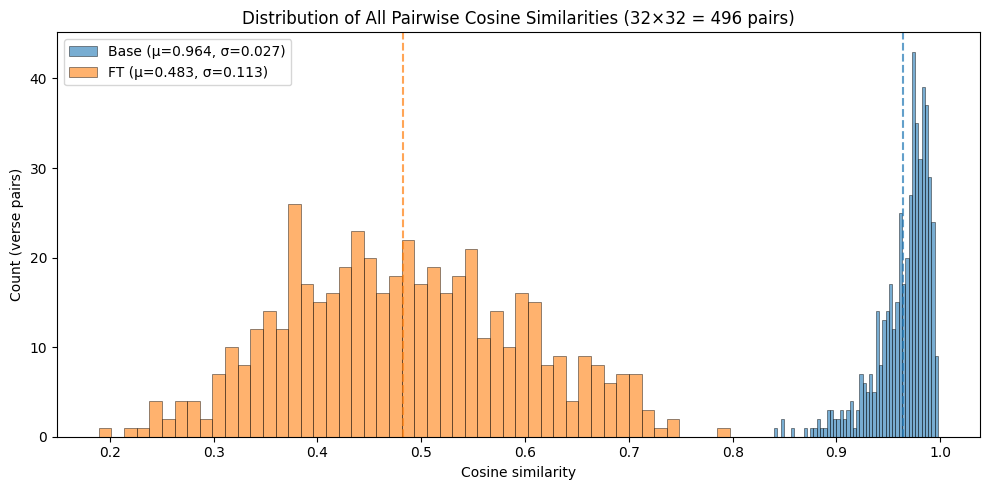

Uniformity (lower = more uniform distribution on hypersphere):
  Base: -0.1383
  FT:   -1.9660

Pairwise cosine statistics:
  Base:  mean=0.9641, std=0.0268, min=0.8399, max=0.9978
  FT:    mean=0.4829, std=0.1126, min=0.1895, max=0.7973


In [12]:
# All pairwise similarities among 32 Sanskrit verses (upper triangle, excluding diagonal)
base_sim_all = cosine_similarity(base_sa_embs)
ft_sim_all = cosine_similarity(ft_sa_embs)

n = len(all_sa_texts)
triu_idx = np.triu_indices(n, k=1)
base_pairwise = base_sim_all[triu_idx]
ft_pairwise = ft_sim_all[triu_idx]

fig, ax = plt.subplots(figsize=(10, 5))
ax.hist(base_pairwise, bins=50, alpha=0.6, label=f"Base (μ={np.mean(base_pairwise):.3f}, σ={np.std(base_pairwise):.3f})",
        color="tab:blue", edgecolor="black", linewidth=0.5)
ax.hist(ft_pairwise, bins=50, alpha=0.6, label=f"FT (μ={np.mean(ft_pairwise):.3f}, σ={np.std(ft_pairwise):.3f})",
        color="tab:orange", edgecolor="black", linewidth=0.5)
ax.axvline(np.mean(base_pairwise), color="tab:blue", linestyle="--", alpha=0.7)
ax.axvline(np.mean(ft_pairwise), color="tab:orange", linestyle="--", alpha=0.7)
ax.set_xlabel("Cosine similarity")
ax.set_ylabel("Count (verse pairs)")
ax.set_title(f"Distribution of All Pairwise Cosine Similarities ({n}×{n} = {len(base_pairwise)} pairs)")
ax.legend()
plt.tight_layout()
plt.show()

# Uniformity metric: log of average pairwise Gaussian kernel (lower = more uniform)
# Wang & Isola (2020) uniformity metric: -log E[exp(-2||z_i - z_j||^2)]
def uniformity(embs, t=2):
    """Alignment & Uniformity metrics (Wang & Isola 2020). Lower uniformity = more uniform."""
    norms = embs / np.linalg.norm(embs, axis=1, keepdims=True)
    sq_pdist = np.sum((norms[:, None] - norms[None, :]) ** 2, axis=-1)
    triu = sq_pdist[np.triu_indices(len(norms), k=1)]
    return np.log(np.mean(np.exp(-t * triu)))

base_unif = uniformity(base_sa_embs)
ft_unif = uniformity(ft_sa_embs)

print(f"Uniformity (lower = more uniform distribution on hypersphere):")
print(f"  Base: {base_unif:.4f}")
print(f"  FT:   {ft_unif:.4f}")
print(f"\nPairwise cosine statistics:")
print(f"  Base:  mean={np.mean(base_pairwise):.4f}, std={np.std(base_pairwise):.4f}, "
      f"min={np.min(base_pairwise):.4f}, max={np.max(base_pairwise):.4f}")
print(f"  FT:    mean={np.mean(ft_pairwise):.4f}, std={np.std(ft_pairwise):.4f}, "
      f"min={np.min(ft_pairwise):.4f}, max={np.max(ft_pairwise):.4f}")

## 11. Triplet discrimination test

Given explicit (anchor, positive, negative) triplets, measure: does cos(anchor, positive) > cos(anchor, negative)? Reports triplet accuracy — the most direct metric for contrastive embedding quality.

In [13]:
# Triplet test: (anchor, positive, negative) — positive should be closer than negative
triplets = [
    # --- Monolingual Sa: same-theme positive, different-theme negative ---
    ("SS 1.7 ↔ SK 3 vs SS 3.45",
     SIVA_SUTRA["SS_1.7"], SPANDA_KARIKA["SK_3"], SIVA_SUTRA["SS_3.45"],
     "mono_sa"),
    ("SS 1.12 ↔ SK 11 vs SK 48",
     SIVA_SUTRA["SS_1.12"], SPANDA_KARIKA["SK_11"], SPANDA_KARIKA["SK_48"],
     "mono_sa"),
    ("SS 3.26 ↔ SK 30 vs SS 3.45",
     SIVA_SUTRA["SS_3.26"], SPANDA_KARIKA["SK_30"], SIVA_SUTRA["SS_3.45"],
     "mono_sa"),
    ("SK 21 ↔ SK 44 vs SS 1.1",
     SPANDA_KARIKA["SK_21"], SPANDA_KARIKA["SK_44"], SIVA_SUTRA["SS_1.1"],
     "mono_sa"),
    ("SS 1.5 ↔ SK 22 vs SS 2.6",
     SIVA_SUTRA["SS_1.5"], SPANDA_KARIKA["SK_22"], SIVA_SUTRA["SS_2.6"],
     "mono_sa"),
    ("SS 1.22 ↔ SS 2.1 vs SK 9",
     SIVA_SUTRA["SS_1.22"], SIVA_SUTRA["SS_2.1"], SPANDA_KARIKA["SK_9"],
     "mono_sa"),
    ("SK 1 ↔ SK 2 vs SS 3.12",
     SPANDA_KARIKA["SK_1"], SPANDA_KARIKA["SK_2"], SIVA_SUTRA["SS_3.12"],
     "mono_sa"),
    ("SS 3.43 ↔ SK 9 vs SS 2.1",
     SIVA_SUTRA["SS_3.43"], SPANDA_KARIKA["SK_9"], SIVA_SUTRA["SS_2.1"],
     "mono_sa"),

    # --- Cross-lingual: Sa anchor, En positive (own translation), En negative (other) ---
    ("SS 1.1 Sa ↔ SS 1.1 En vs SS 3.45 En",
     SIVA_SUTRA["SS_1.1"], SIVA_SUTRA_EN["SS_1.1"], SIVA_SUTRA_EN["SS_3.45"],
     "cross_lingual"),
    ("SK 22 Sa ↔ SK 22 En vs SK 2 En",
     SPANDA_KARIKA["SK_22"], SPANDA_KARIKA_EN["SK_22"], SPANDA_KARIKA_EN["SK_2"],
     "cross_lingual"),
    ("SK 30 Sa ↔ SK 30 En vs SS 1.2 En",
     SPANDA_KARIKA["SK_30"], SPANDA_KARIKA_EN["SK_30"], SIVA_SUTRA_EN["SS_1.2"],
     "cross_lingual"),
    ("SS 3.9 Sa ↔ SS 3.9 En vs SK 48 En",
     SIVA_SUTRA["SS_3.9"], SIVA_SUTRA_EN["SS_3.9"], SPANDA_KARIKA_EN["SK_48"],
     "cross_lingual"),
    ("SK 5 Sa ↔ SK 5 En vs SS 1.18 En",
     SPANDA_KARIKA["SK_5"], SPANDA_KARIKA_EN["SK_5"], SIVA_SUTRA_EN["SS_1.18"],
     "cross_lingual"),
    ("SS 1.7 Sa ↔ SS 1.7 En vs SK 48 En",
     SIVA_SUTRA["SS_1.7"], SIVA_SUTRA_EN["SS_1.7"], SPANDA_KARIKA_EN["SK_48"],
     "cross_lingual"),

    # --- Hard triplets: positive and negative are both somewhat related ---
    ("SS 1.1 ↔ SS 1.17 vs SS 3.9 (all ātmā)",
     SIVA_SUTRA["SS_1.1"], SIVA_SUTRA["SS_1.17"], SIVA_SUTRA["SS_3.9"],
     "hard"),
    ("SK 3 ↔ SK 17 vs SK 21 (all spanda/states)",
     SPANDA_KARIKA["SK_3"], SPANDA_KARIKA["SK_17"], SPANDA_KARIKA["SK_21"],
     "hard"),
]

# Evaluate
print(f"{'':>50} {'Base':>12} {'FT':>12}")
print(f"{'Triplet':<50} {'pos > neg':>12} {'pos > neg':>12}")
print("=" * 76)

results = {"mono_sa": [0, 0, 0], "cross_lingual": [0, 0, 0], "hard": [0, 0, 0]}  # [n, base_ok, ft_ok]

for label, anchor, positive, negative, category in triplets:
    b_embs = base_model.encode([anchor, positive, negative])
    f_embs = ft_model.encode([anchor, positive, negative])

    b_pos = cosine_similarity([b_embs[0]], [b_embs[1]])[0, 0]
    b_neg = cosine_similarity([b_embs[0]], [b_embs[2]])[0, 0]
    f_pos = cosine_similarity([f_embs[0]], [f_embs[1]])[0, 0]
    f_neg = cosine_similarity([f_embs[0]], [f_embs[2]])[0, 0]

    b_ok = b_pos > b_neg
    f_ok = f_pos > f_neg
    results[category][0] += 1
    results[category][1] += b_ok
    results[category][2] += f_ok

    b_marker = "✓" if b_ok else "✗"
    f_marker = "✓" if f_ok else "✗"
    b_margin = b_pos - b_neg
    f_margin = f_pos - f_neg
    print(f"{label:<50} {b_marker} Δ={b_margin:+.3f}  {f_marker} Δ={f_margin:+.3f}")

total_base = sum(v[1] for v in results.values())
total_ft = sum(v[2] for v in results.values())
n_total = sum(v[0] for v in results.values())

print("=" * 76)
print(f"\n{'Category':<25} {'N':>4} {'Base':>12} {'FT':>12}")
print("-" * 55)
for cat, (n, b, f) in results.items():
    print(f"{cat:<25} {n:>4} {b}/{n} ({100*b/n:.0f}%)    {f}/{n} ({100*f/n:.0f}%)")
print("-" * 55)
print(f"{'TOTAL':<25} {n_total:>4} {total_base}/{n_total} ({100*total_base/n_total:.0f}%)    "
      f"{total_ft}/{n_total} ({100*total_ft/n_total:.0f}%)")

                                                           Base           FT
Triplet                                               pos > neg    pos > neg


Encoding:   0%|          | 0/3 [00:00<?, ?sent/s]

Encoding: 100%|██████████| 3/3 [00:00<00:00, 33.90sent/s]

Encoding:   0%|          | 0/3 [00:00<?, ?sent/s]

Encoding: 100%|██████████| 3/3 [00:00<00:00, 26.64sent/s]

Encoding: 100%|██████████| 3/3 [00:00<00:00, 26.48sent/s]

SS 1.7 ↔ SK 3 vs SS 3.45                           ✗ Δ=-0.008  ✓ Δ=+0.306


Encoding:   0%|          | 0/3 [00:00<?, ?sent/s]

Encoding: 100%|██████████| 3/3 [00:00<00:00, 34.47sent/s]

Encoding:   0%|          | 0/3 [00:00<?, ?sent/s]

Encoding: 100%|██████████| 3/3 [00:00<00:00, 26.84sent/s]

Encoding: 100%|██████████| 3/3 [00:00<00:00, 26.68sent/s]

SS 1.12 ↔ SK 11 vs SK 48                           ✗ Δ=-0.022  ✓ Δ=+0.009


Encoding:   0%|          | 0/3 [00:00<?, ?sent/s]

Encoding: 100%|██████████| 3/3 [00:00<00:00, 34.30sent/s]

Encoding:   0%|          | 0/3 [00:00<?, ?sent/s]

Encoding: 100%|██████████| 3/3 [00:00<00:00, 26.72sent/s]

Encoding: 100%|██████████| 3/3 [00:00<00:00, 26.56sent/s]

SS 3.26 ↔ SK 30 vs SS 3.45                         ✓ Δ=+0.019  ✗ Δ=-0.161


Encoding:   0%|          | 0/3 [00:00<?, ?sent/s]

Encoding: 100%|██████████| 3/3 [00:00<00:00, 34.45sent/s]

Encoding:   0%|          | 0/3 [00:00<?, ?sent/s]

Encoding: 100%|██████████| 3/3 [00:00<00:00, 26.99sent/s]

Encoding: 100%|██████████| 3/3 [00:00<00:00, 26.84sent/s]

SK 21 ↔ SK 44 vs SS 1.1                            ✓ Δ=+0.053  ✗ Δ=-0.044


Encoding:   0%|          | 0/3 [00:00<?, ?sent/s]

Encoding: 100%|██████████| 3/3 [00:00<00:00, 34.57sent/s]

Encoding:   0%|          | 0/3 [00:00<?, ?sent/s]

Encoding: 100%|██████████| 3/3 [00:00<00:00, 27.03sent/s]

Encoding: 100%|██████████| 3/3 [00:00<00:00, 26.88sent/s]

SS 1.5 ↔ SK 22 vs SS 2.6                           ✗ Δ=-0.012  ✗ Δ=-0.338


Encoding:   0%|          | 0/3 [00:00<?, ?sent/s]

Encoding: 100%|██████████| 3/3 [00:00<00:00, 34.42sent/s]

Encoding:   0%|          | 0/3 [00:00<?, ?sent/s]

Encoding: 100%|██████████| 3/3 [00:00<00:00, 26.99sent/s]

Encoding: 100%|██████████| 3/3 [00:00<00:00, 26.78sent/s]

SS 1.22 ↔ SS 2.1 vs SK 9                           ✗ Δ=-0.019  ✓ Δ=+0.215


Encoding:   0%|          | 0/3 [00:00<?, ?sent/s]

Encoding: 100%|██████████| 3/3 [00:00<00:00, 34.76sent/s]

Encoding:   0%|          | 0/3 [00:00<?, ?sent/s]

Encoding: 100%|██████████| 3/3 [00:00<00:00, 27.03sent/s]

Encoding: 100%|██████████| 3/3 [00:00<00:00, 26.87sent/s]

SK 1 ↔ SK 2 vs SS 3.12                             ✓ Δ=+0.005  ✗ Δ=-0.030


Encoding:   0%|          | 0/3 [00:00<?, ?sent/s]

Encoding: 100%|██████████| 3/3 [00:00<00:00, 34.48sent/s]

Encoding:   0%|          | 0/3 [00:00<?, ?sent/s]

Encoding: 100%|██████████| 3/3 [00:00<00:00, 27.09sent/s]

Encoding: 100%|██████████| 3/3 [00:00<00:00, 26.89sent/s]

SS 3.43 ↔ SK 9 vs SS 2.1                           ✗ Δ=-0.026  ✓ Δ=+0.244


Encoding:   0%|          | 0/3 [00:00<?, ?sent/s]

Encoding: 100%|██████████| 3/3 [00:00<00:00, 34.54sent/s]

Encoding:   0%|          | 0/3 [00:00<?, ?sent/s]

Encoding: 100%|██████████| 3/3 [00:00<00:00, 27.10sent/s]

Encoding: 100%|██████████| 3/3 [00:00<00:00, 26.89sent/s]

SS 1.1 Sa ↔ SS 1.1 En vs SS 3.45 En                ✓ Δ=+0.085  ✓ Δ=+0.531


Encoding:   0%|          | 0/3 [00:00<?, ?sent/s]

Encoding: 100%|██████████| 3/3 [00:00<00:00, 34.59sent/s]

Encoding:   0%|          | 0/3 [00:00<?, ?sent/s]

Encoding: 100%|██████████| 3/3 [00:00<00:00, 27.00sent/s]

Encoding: 100%|██████████| 3/3 [00:00<00:00, 26.82sent/s]

SK 22 Sa ↔ SK 22 En vs SK 2 En                     ✓ Δ=+0.012  ✓ Δ=+0.250


Encoding:   0%|          | 0/3 [00:00<?, ?sent/s]

Encoding: 100%|██████████| 3/3 [00:00<00:00, 34.43sent/s]

Encoding:   0%|          | 0/3 [00:00<?, ?sent/s]

Encoding: 100%|██████████| 3/3 [00:00<00:00, 26.99sent/s]

Encoding: 100%|██████████| 3/3 [00:00<00:00, 26.83sent/s]

SK 30 Sa ↔ SK 30 En vs SS 1.2 En                   ✓ Δ=+0.032  ✓ Δ=+0.224


Encoding:   0%|          | 0/3 [00:00<?, ?sent/s]

Encoding: 100%|██████████| 3/3 [00:00<00:00, 34.54sent/s]

Encoding:   0%|          | 0/3 [00:00<?, ?sent/s]

Encoding: 100%|██████████| 3/3 [00:00<00:00, 26.91sent/s]

Encoding: 100%|██████████| 3/3 [00:00<00:00, 26.76sent/s]

SS 3.9 Sa ↔ SS 3.9 En vs SK 48 En                  ✗ Δ=-0.010  ✓ Δ=+0.259


Encoding:   0%|          | 0/3 [00:00<?, ?sent/s]

Encoding: 100%|██████████| 3/3 [00:00<00:00, 34.82sent/s]

Encoding:   0%|          | 0/3 [00:00<?, ?sent/s]

Encoding: 100%|██████████| 3/3 [00:00<00:00, 27.31sent/s]

Encoding: 100%|██████████| 3/3 [00:00<00:00, 27.17sent/s]

SK 5 Sa ↔ SK 5 En vs SS 1.18 En                    ✗ Δ=-0.037  ✓ Δ=+0.126


Encoding:   0%|          | 0/3 [00:00<?, ?sent/s]

Encoding: 100%|██████████| 3/3 [00:00<00:00, 34.84sent/s]

Encoding:   0%|          | 0/3 [00:00<?, ?sent/s]

Encoding: 100%|██████████| 3/3 [00:00<00:00, 27.23sent/s]

Encoding: 100%|██████████| 3/3 [00:00<00:00, 27.09sent/s]

SS 1.7 Sa ↔ SS 1.7 En vs SK 48 En                  ✗ Δ=-0.011  ✓ Δ=+0.318


Encoding:   0%|          | 0/3 [00:00<?, ?sent/s]

Encoding: 100%|██████████| 3/3 [00:00<00:00, 34.84sent/s]

Encoding:   0%|          | 0/3 [00:00<?, ?sent/s]

Encoding: 100%|██████████| 3/3 [00:00<00:00, 27.04sent/s]

Encoding: 100%|██████████| 3/3 [00:00<00:00, 26.84sent/s]

SS 1.1 ↔ SS 1.17 vs SS 3.9 (all ātmā)              ✓ Δ=+0.003  ✓ Δ=+0.118


Encoding:   0%|          | 0/3 [00:00<?, ?sent/s]

Encoding: 100%|██████████| 3/3 [00:00<00:00, 33.37sent/s]

Encoding:   0%|          | 0/3 [00:00<?, ?sent/s]

Encoding: 100%|██████████| 3/3 [00:00<00:00, 26.27sent/s]

Encoding: 100%|██████████| 3/3 [00:00<00:00, 26.10sent/s]

SK 3 ↔ SK 17 vs SK 21 (all spanda/states)          ✓ Δ=+0.033  ✗ Δ=-0.224

Category                     N         Base           FT
-------------------------------------------------------
mono_sa                      8 3/8 (38%)    4/8 (50%)
cross_lingual                6 3/6 (50%)    6/6 (100%)
hard                         2 2/2 (100%)    1/2 (50%)
-------------------------------------------------------
TOTAL                       16 8/16 (50%)    11/16 (69%)


## 12. Nearest neighbor audit

For selected query verses, show the 5 nearest neighbors in the full Sanskrit corpus. This is the semantic search use case: given a verse, what does the model consider most similar?

In [14]:
# Use precomputed FT embeddings from section 9
# all_sa_ids, all_sa_texts, ft_sa_embs already available

# Also include English translations in the corpus for cross-lingual NN
all_ids = all_sa_ids + [f"{k} (En)" for k in all_en_ids]
all_texts = all_sa_texts + all_en_texts
all_ft_embs = np.vstack([ft_sa_embs, ft_en_embs])

# Query verses to audit
query_verses = [
    ("SS_1.7", "जाग्रत्स्वप्नसुषुप्तभेदे तुर्याभोगसम्भवः",
     "Three states / turīya — expect SK 3, SK 17 (spanda in states)"),
    ("SK_30", "इति वा यस्य संवित्तिः क्रीडात्वेनाखिलं जगत् / स पश्यन्सततं युक्तो जीवन्मुक्तो न संशयः",
     "Jīvanmukti / world as play — expect SS 3.26, SS 3.43"),
    ("SS_1.1", "चैतन्यमात्मा",
     "Consciousness is Self — short sūtra, expect ātmā-related neighbors"),
    ("SK_22", "अतिक्रुद्धः प्रहृष्टो वा किं करोमीति वा मृशन् / धावन्वा यत्पदं गच्छेत्तत्र स्पन्दः प्रतिष्ठितः",
     "Spanda in extreme states — expect SK 21, SK 3, SS 1.5"),
    ("SS_2.1", "चित्तं मन्त्रः",
     "Mind is mantra — short sūtra, expect SS 1.22 (mantra-vīrya)"),
    ("SK_48", "सैषा क्रियात्मिका शक्तिः शिवस्य पशुवर्तिनी / बन्धयित्री स्वमार्गस्था ज्ञाता सिद्ध्युपपादिका",
     "Śakti as binding/liberating force — expect SS 1.6, SK 1 (śakticakra)"),
]

sim_matrix = cosine_similarity(all_ft_embs)

for q_id, q_text, expectation in query_verses:
    # Find query index
    q_idx = all_ids.index(q_id)
    sims = sim_matrix[q_idx]

    # Sort by similarity, exclude self
    ranked = sorted(enumerate(sims), key=lambda x: x[1], reverse=True)
    ranked = [(idx, s) for idx, s in ranked if idx != q_idx]

    print(f"\n{'='*80}")
    print(f"Query: {q_id}  {q_text[:70]}")
    print(f"  Expected: {expectation}")
    print(f"{'='*80}")
    print(f"  {'Rank':<5} {'ID':<20} {'Sim':>7}  Text")
    print(f"  {'-'*75}")
    for rank, (idx, sim) in enumerate(ranked[:7], 1):
        text_preview = all_texts[idx][:55]
        print(f"  {rank:<5} {all_ids[idx]:<20} {sim:>7.4f}  {text_preview}")


Query: SS_1.7  जाग्रत्स्वप्नसुषुप्तभेदे तुर्याभोगसम्भवः
  Expected: Three states / turīya — expect SK 3, SK 17 (spanda in states)
  Rank  ID                       Sim  Text
  ---------------------------------------------------------------------------
  1     SK_21                 0.7973  अतः सततमुद्युक्तः स्पन्दतत्त्वविविक्तये / जाग्रदेव निजं
  2     SS_1.7 (En)           0.7787  Even during the differentiation of waking, dream, and d
  3     SK_30 (En)            0.7471  He who has the realization that the entire world is div
  4     SS_2.5 (En)           0.7198  When knowledge of one's Self arises naturally, one move
  5     SK_30                 0.7187  इति वा यस्य संवित्तिः क्रीडात्वेनाखिलं जगत् / स पश्यन्स
  6     SS_1.1 (En)           0.7186  Consciousness is the Self.
  7     SS_1.17 (En)          0.6978  Wordless discernment is the knowledge of the Self.

Query: SK_30  इति वा यस्य संवित्तिः क्रीडात्वेनाखिलं जगत् / स पश्यन्सततं युक्तो जीवन
  Expected: Jīvanmukti / world as play